<a href="https://colab.research.google.com/github/mahin-arvind/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Loading Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Datasets/Classification/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
#df = pd.read_excel(path)
df = pd.read_csv(path)

#EDA

##Inspection

In [4]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [5]:
df.drop('id', axis =1, inplace = True)

In [6]:
df.shape

(381109, 11)

In [7]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB
None


##Missing Values

In [9]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No missing values present in the dataset

##Univariate Analysis

In [10]:
numeric_features = ['Age','Annual_Premium', 'Vintage','Policy_Sales_Channel', 'Region_Code']
cat_label_features = ['Vehicle_Age', 'Gender' ,'Vehicle_Damage' ]
cat_boolean_features = ['Driving_License','Previously_Insured', 'Response']
cat_features = cat_label_features + cat_boolean_features

### Numerical Categories

#### Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

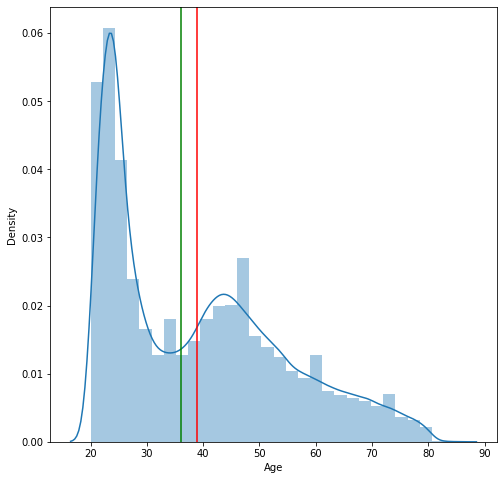

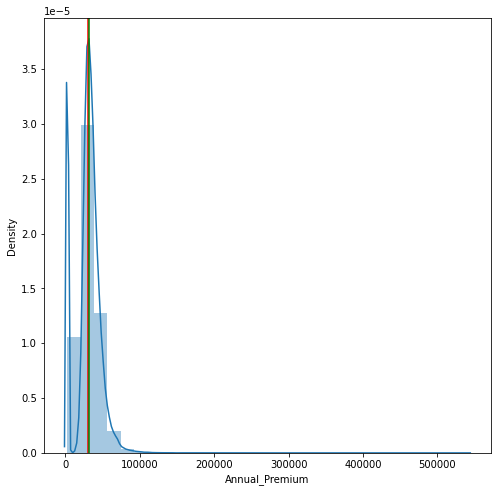

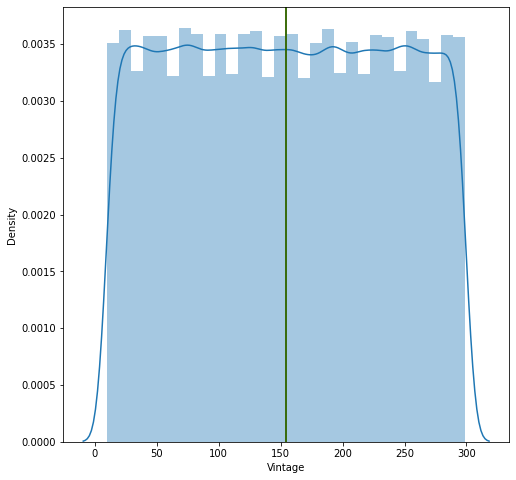

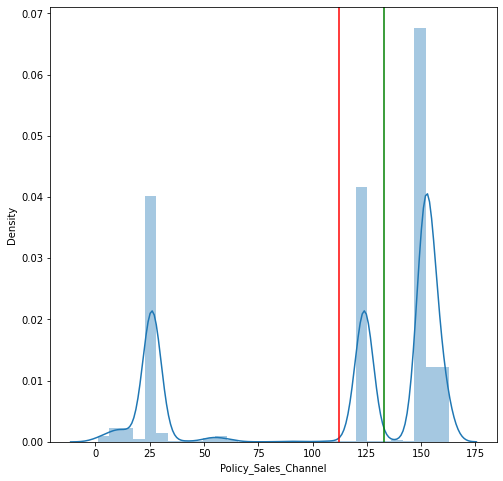

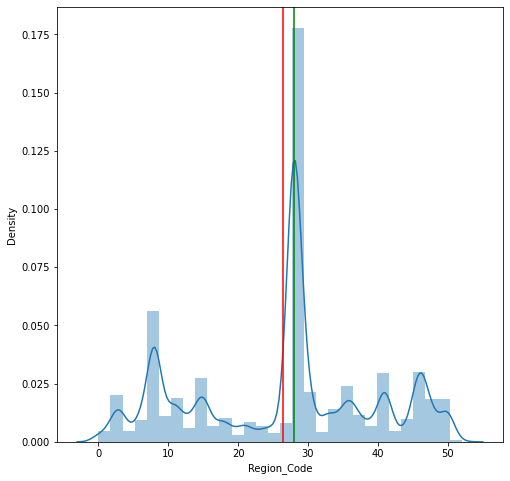

In [11]:
for feature in numeric_features:
  plt.figure(figsize = (8,8))
  sns.distplot(df[feature], bins = 30)
  plt.axvline(x= df[feature].mean(),
              color='red')
  plt.axvline(x= df[feature].median(),
              color='g')


* Policy Channels have high densities in certain range of channels alone. This could indicate there are certain preferred channels for the predominant population. We could consider binning this feature.

* Annual Premium shows normal distribution

* Large number of population are in their early twenty's and mid forty's.

#### Box Plot

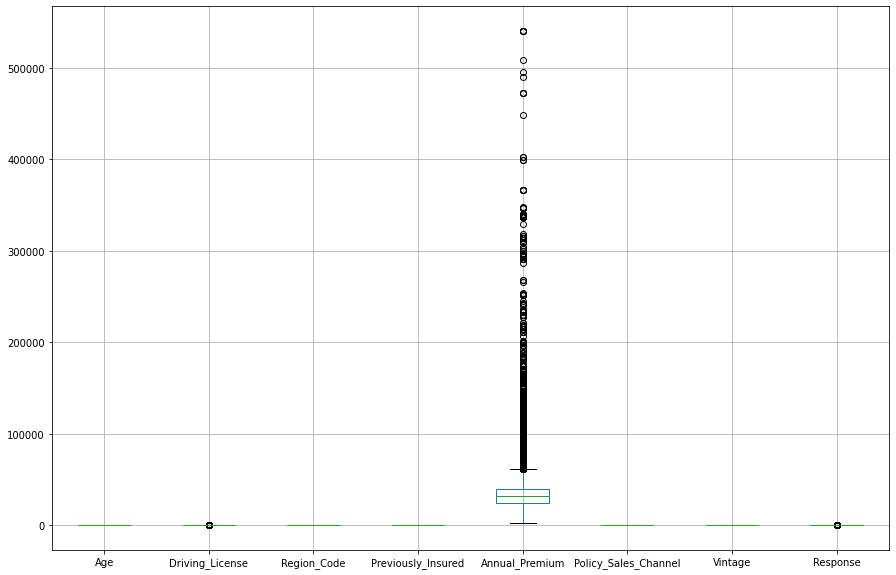

In [12]:
df.boxplot( figsize = (15,10))

Annual Premium has considerable amount of outliers 

###Categorical Columns

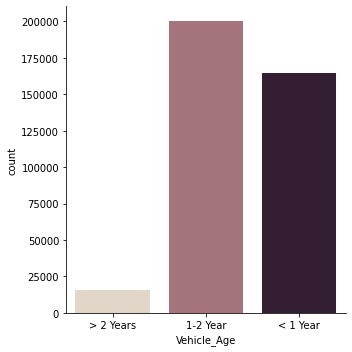

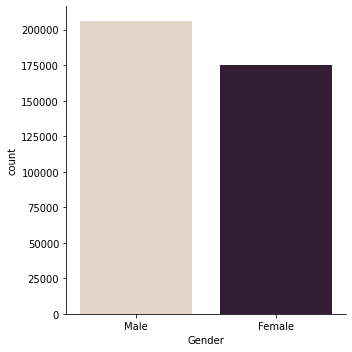

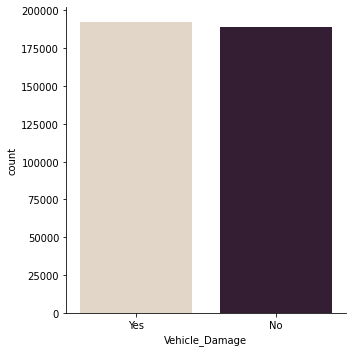

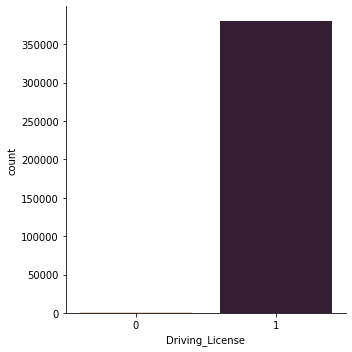

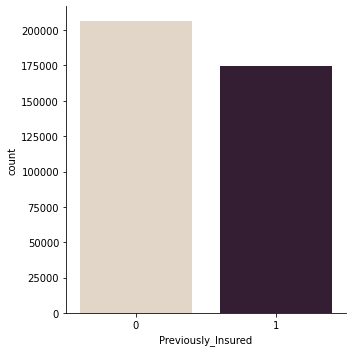

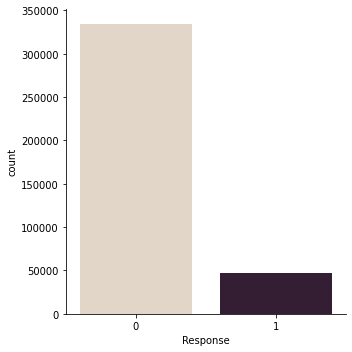

In [13]:
for feature in (cat_label_features + cat_boolean_features  ):
  sns.catplot(x=feature, kind="count", palette="ch:.25", data=df)


* There is a very low ratio of people without driving license which is explained because the data is collected for Vehicle Insurance

* The target i.e responses columns has more negative response than positive responses which explains that the dataset is IMBALANCED.

* Most population's Vehicle Age is in between 0-2 years since most people subscribe their insurances succeeding the purchase of the vehicle

## Bivariate Analysis

### Continuous and Continuous

####Correlation Heatmap

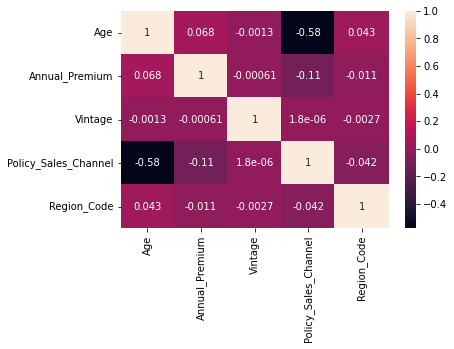

In [14]:
sns.heatmap(df.loc[:,numeric_features].corr(), annot = True)

Age and Policy_sales_channel exhibit correlation of -0.58	

#### Scatter Plot

Age vs Policy Channel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.YTick at 0x7f252ae69890>,
 <a list of 83 Text major ticklabel objects>)

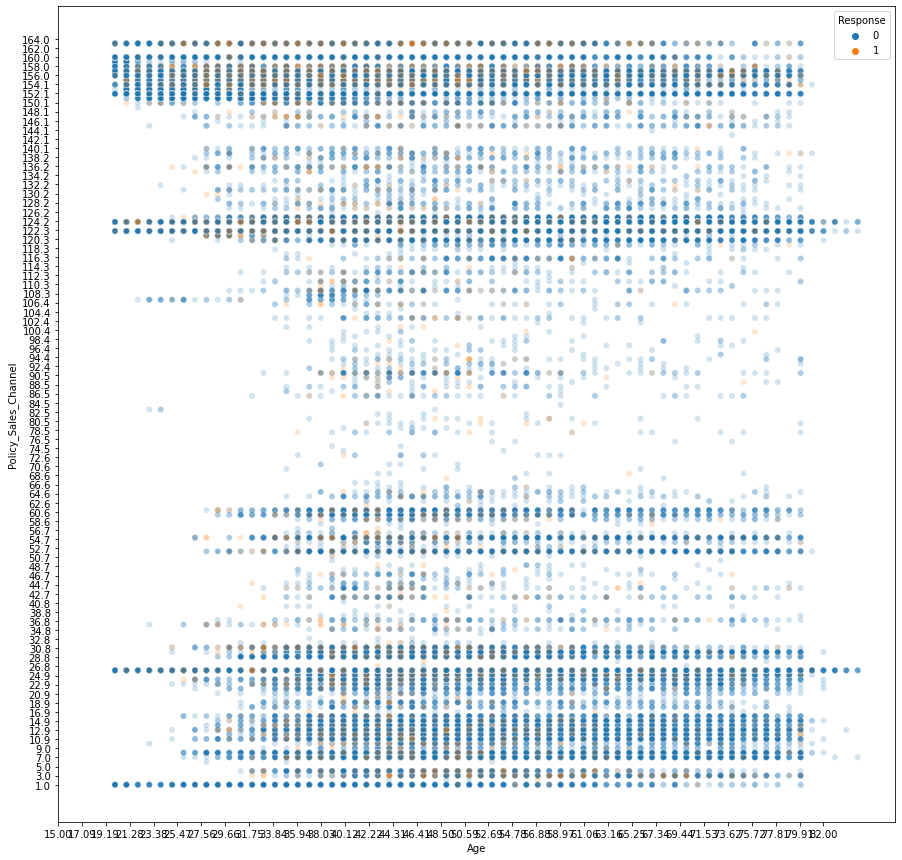

In [15]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Age'],df['Policy_Sales_Channel'],hue = df['Response'],alpha = 0.2)
plt.xticks(ticks = np.linspace(15,82,33))
plt.yticks(ticks = np.linspace(1,164,83))

We can observe that among 155 Policy channels most people prefer channels in certain ranges. From the dense horizontal bars on the graph.

Relationship between annual premium and age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


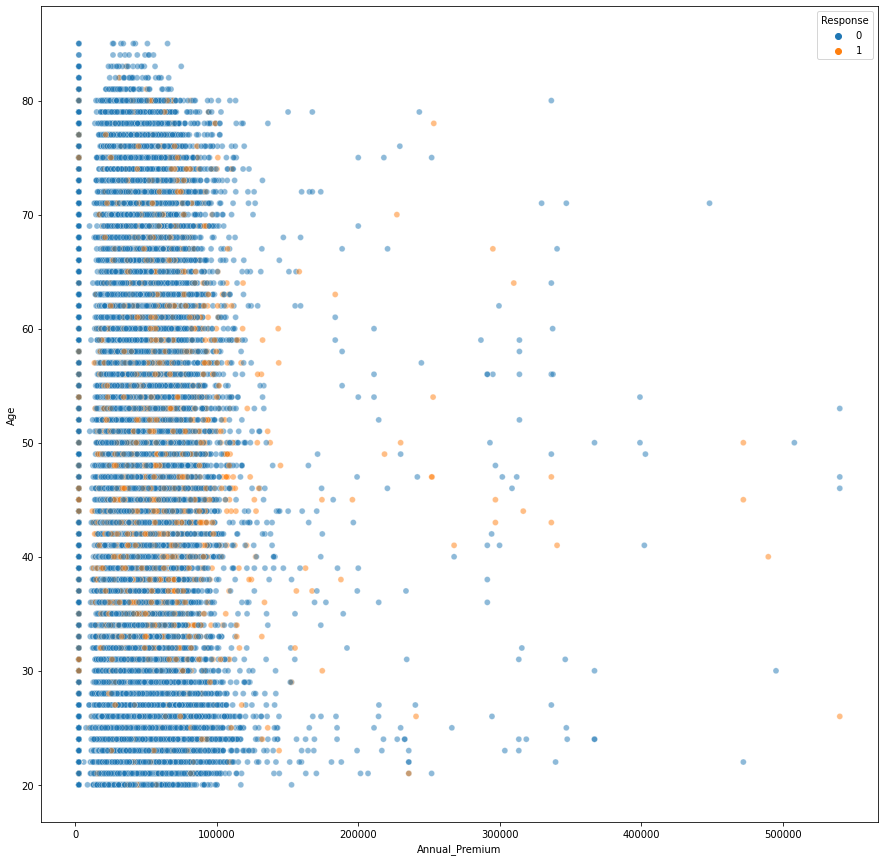

In [16]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Annual_Premium'],df['Age'],hue = df['Response'],alpha = 0.5)


#### VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


VIF              variable
0  5.044031                   Age
1  3.737498        Annual_Premium
2  3.995835               Vintage
3  3.623176  Policy_Sales_Channel
4  4.445521           Region_Code

### Categorical and Categorical

#### Test of Association

In [18]:
pip install researchpy

In [19]:
import researchpy as rp


In [20]:
cat_features

['Vehicle_Age',
 'Gender',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured',
 'Response']

In [21]:
from statsmodels.stats.contingency_tables import Table2x2
catcopy = cat_features.copy()
table = {'feature1':[],
         'feature2':[], 
         'Cramers_V_Score':[], 
         "Interpretation":[]}

for ftr1 in cat_features:
  for ftr2 in catcopy:
    if ftr1 != ftr2:
      crosstab, test_results, expected = rp.crosstab(df[ftr1], df[ftr2],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
      score = (test_results.loc[2, 'results'])
      table['feature1'].append(ftr1)
      table['feature2'].append(ftr2)
      
      table['Cramers_V_Score'].append(score)
      if score > 0.25:
        table['Interpretation'].append("Very Strong")
      elif score > 0.15:
        table['Interpretation'].append("Strong")
      elif score > .1:
        table['Interpretation'].append("Moderate")
      elif score >.05:
        table['Interpretation'].append("Weak")
      else:
        table['Interpretation'].append("None/Very Weak")
  catcopy.remove(ftr1)

table = pd.DataFrame(table)

In [22]:
table[table.Cramers_V_Score > 0.25]

feature1            feature2  Cramers_V_Score Interpretation
1          Vehicle_Age      Vehicle_Damage           0.3969    Very Strong
3          Vehicle_Age  Previously_Insured           0.3809    Very Strong
10      Vehicle_Damage  Previously_Insured           0.8241    Very Strong
11      Vehicle_Damage            Response           0.3544    Very Strong
14  Previously_Insured            Response           0.3412    Very Strong

In [23]:
table[table.Interpretation == 'Strong']

feature1  feature2  Cramers_V_Score Interpretation
0  Vehicle_Age    Gender           0.1668         Strong
4  Vehicle_Age  Response           0.2219         Strong

In [24]:
table[table.Interpretation == 'Moderate']

Empty DataFrame
Columns: [feature1, feature2, Cramers_V_Score, Interpretation]
Index: []

In [25]:
table[table.Interpretation == 'Weak']

feature1            feature2  Cramers_V_Score Interpretation
5   Gender      Vehicle_Damage           0.0916           Weak
7   Gender  Previously_Insured           0.0819           Weak
8   Gender            Response           0.0524           Weak

In [26]:
table[table.Interpretation == "None/Very Weak"]

feature1            feature2  Cramers_V_Score  Interpretation
2       Vehicle_Age     Driving_License           0.0402  None/Very Weak
6            Gender     Driving_License           0.0184  None/Very Weak
9    Vehicle_Damage     Driving_License           0.0166  None/Very Weak
12  Driving_License  Previously_Insured           0.0150  None/Very Weak
13  Driving_License            Response           0.0102  None/Very Weak

Upon Chi Square testing of categorical variables, we observe.

* Vehicle Age has a strong statistical relationships with all features and target.

*Vehicle_Age,Previously_Insured have very strong and Vehicle_Damage have strong relationships with the targer variable

* Driving_License appears to have no or very weak statistical relationship on any other features or the targer

In [27]:
table[table.feature2 == 'Response'].sort_values('Cramers_V_Score', ascending = False)

feature1  feature2  Cramers_V_Score  Interpretation
11      Vehicle_Damage  Response           0.3544     Very Strong
14  Previously_Insured  Response           0.3412     Very Strong
4          Vehicle_Age  Response           0.2219          Strong
8               Gender  Response           0.0524            Weak
13     Driving_License  Response           0.0102  None/Very Weak

### Categorical and Continuous

#### CatPlot

<Figure size 576x576 with 0 Axes>

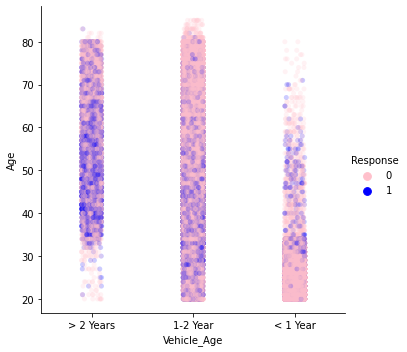

<Figure size 576x576 with 0 Axes>

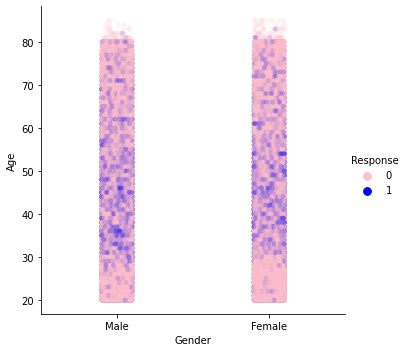

<Figure size 576x576 with 0 Axes>

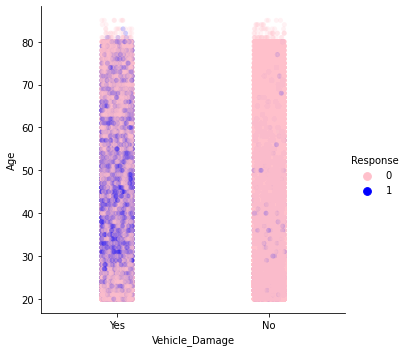

<Figure size 576x576 with 0 Axes>

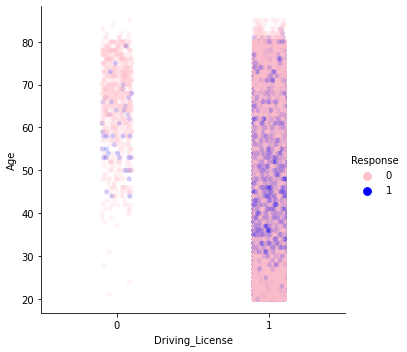

<Figure size 576x576 with 0 Axes>

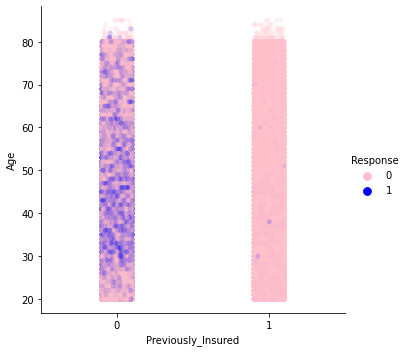

<Figure size 576x576 with 0 Axes>

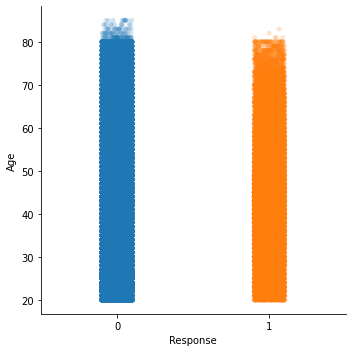

<Figure size 576x576 with 0 Axes>

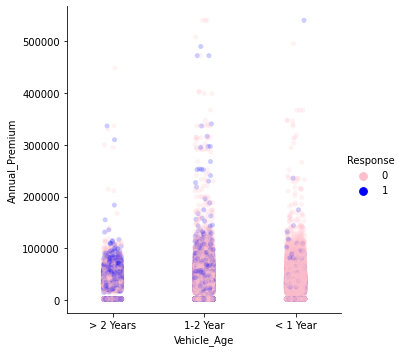

<Figure size 576x576 with 0 Axes>

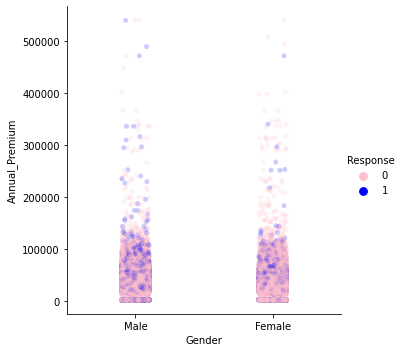

<Figure size 576x576 with 0 Axes>

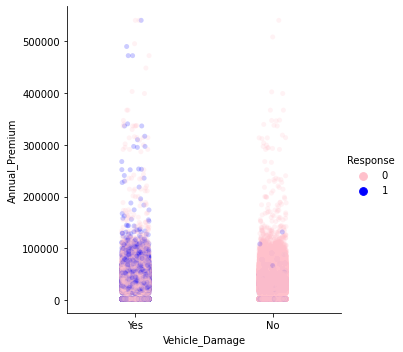

<Figure size 576x576 with 0 Axes>

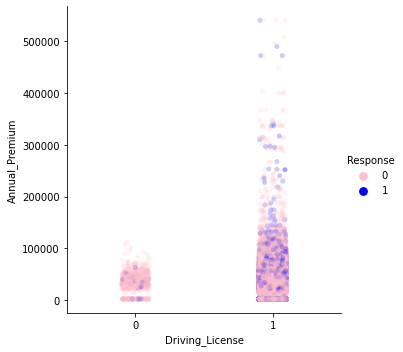

<Figure size 576x576 with 0 Axes>

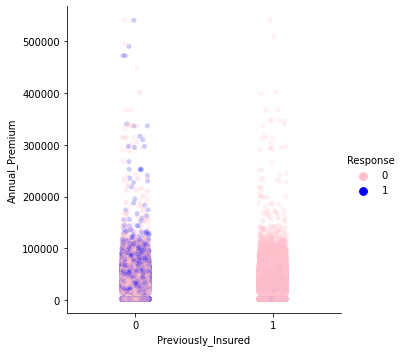

<Figure size 576x576 with 0 Axes>

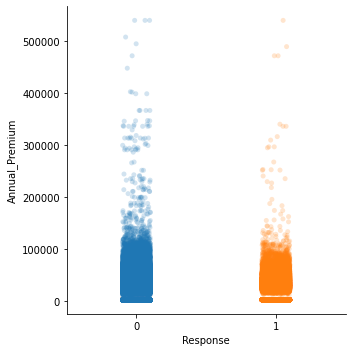

<Figure size 576x576 with 0 Axes>

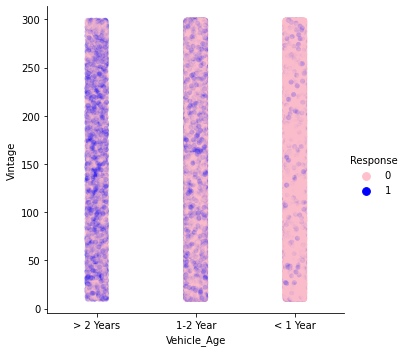

<Figure size 576x576 with 0 Axes>

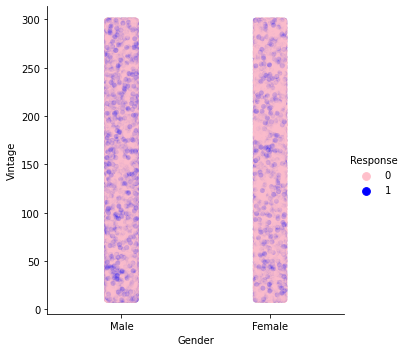

<Figure size 576x576 with 0 Axes>

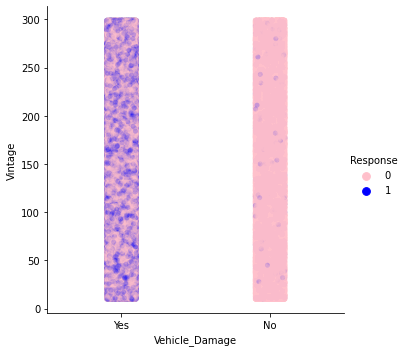

<Figure size 576x576 with 0 Axes>

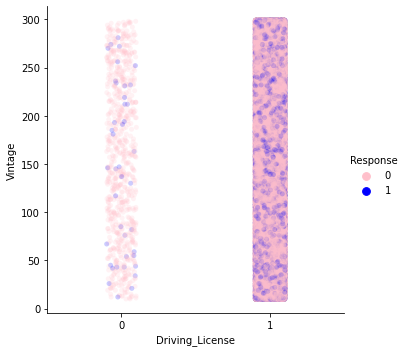

<Figure size 576x576 with 0 Axes>

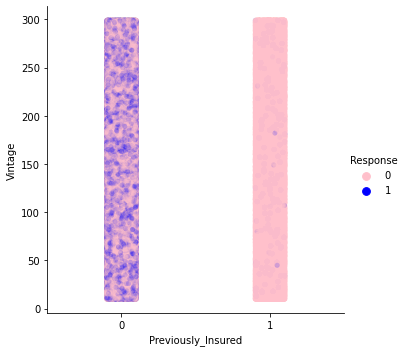

<Figure size 576x576 with 0 Axes>

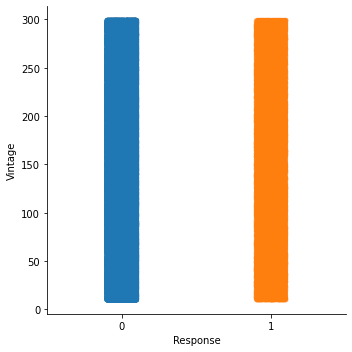

<Figure size 576x576 with 0 Axes>

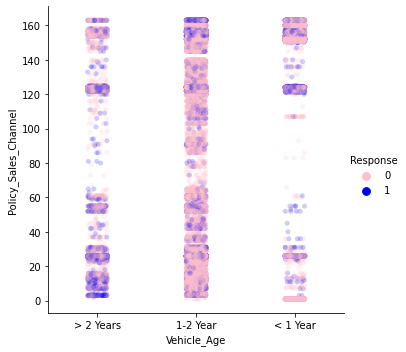

<Figure size 576x576 with 0 Axes>

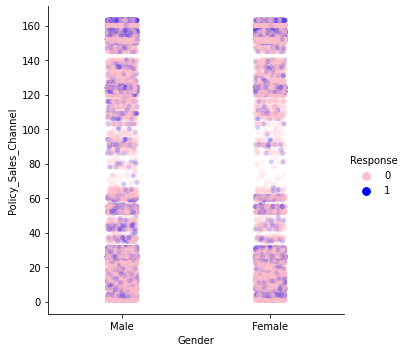

<Figure size 576x576 with 0 Axes>

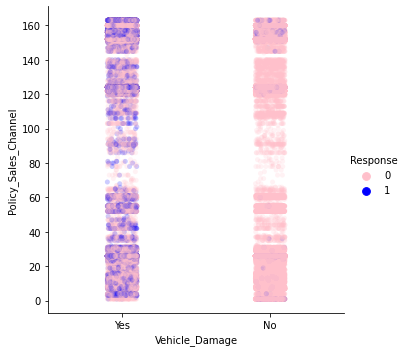

<Figure size 576x576 with 0 Axes>

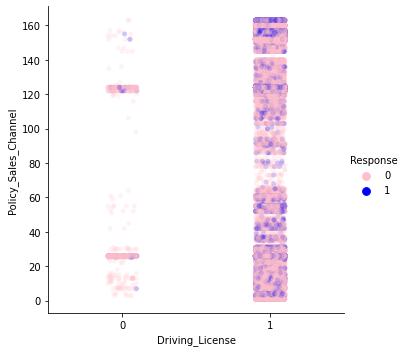

<Figure size 576x576 with 0 Axes>

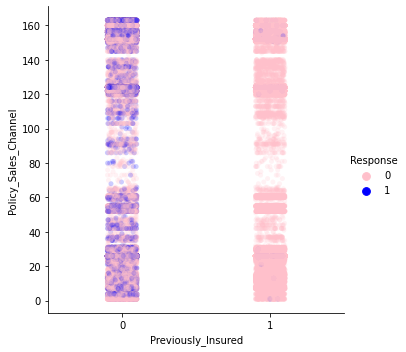

<Figure size 576x576 with 0 Axes>

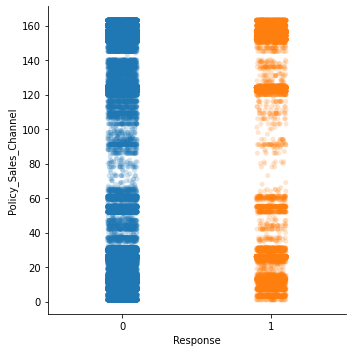

<Figure size 576x576 with 0 Axes>

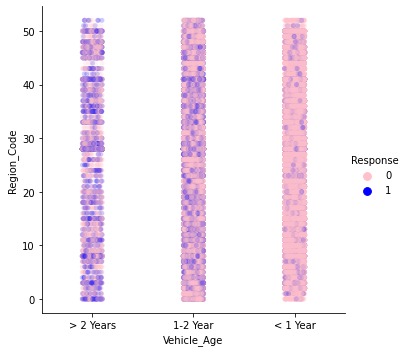

<Figure size 576x576 with 0 Axes>

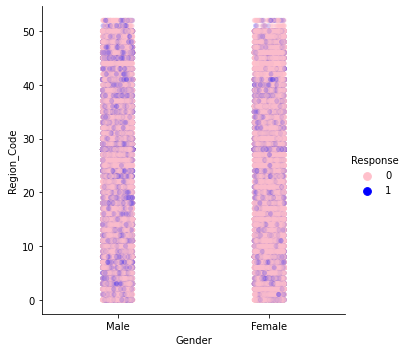

<Figure size 576x576 with 0 Axes>

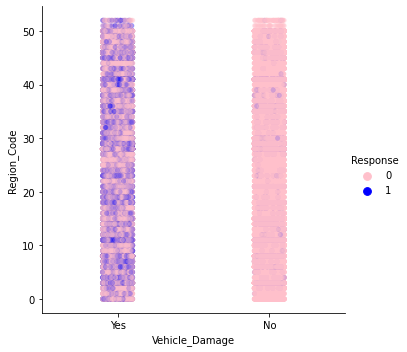

<Figure size 576x576 with 0 Axes>

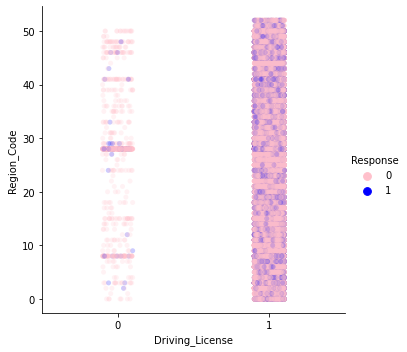

<Figure size 576x576 with 0 Axes>

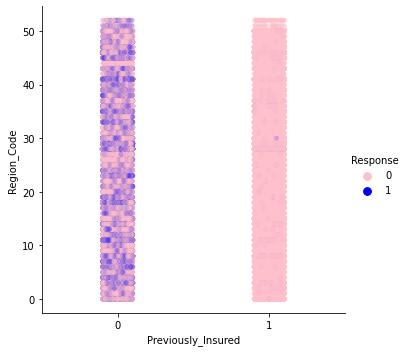

<Figure size 576x576 with 0 Axes>

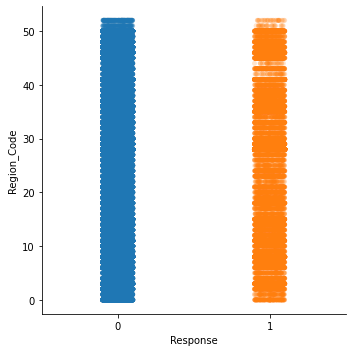

In [28]:
for num in numeric_features:
  for cat in cat_features:
    if cat!= 'Response':
      plt.figure(figsize = (8,8))
      sns.catplot(x=cat, y = num, hue="Response", data= df, alpha = 0.2, palette={0:'pink', 1:'blue' })
    else:
      plt.figure(figsize = (8,8))
      sns.catplot(x=cat, y = num, data= df, alpha = 0.2)
      plt.show()

#### Violin Plot

It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compare

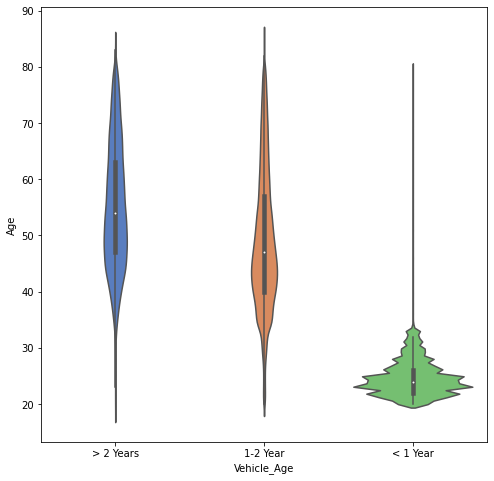

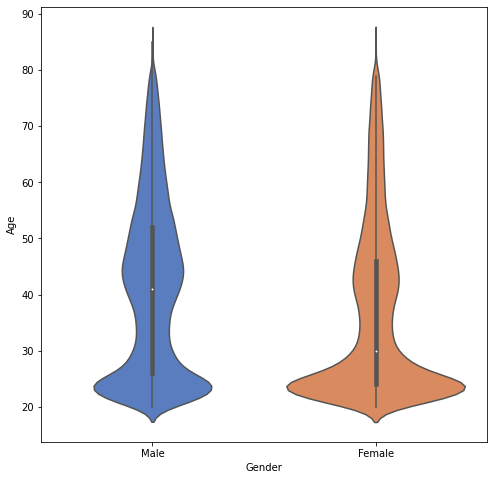

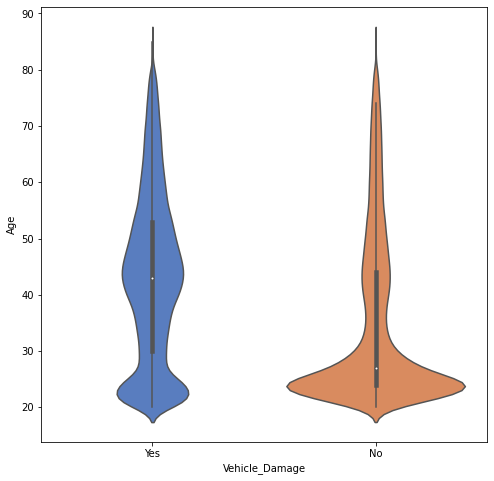

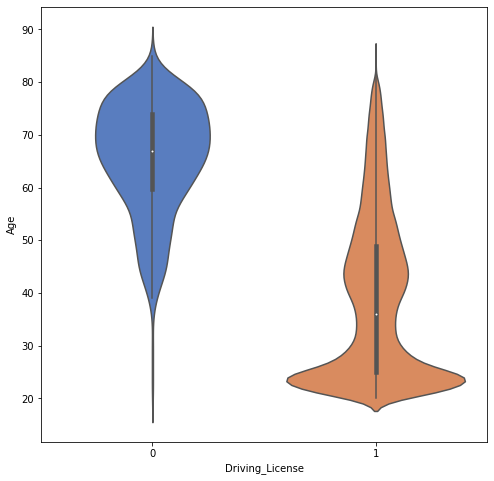

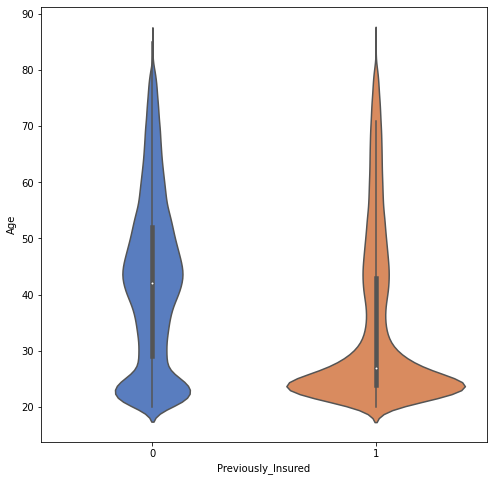

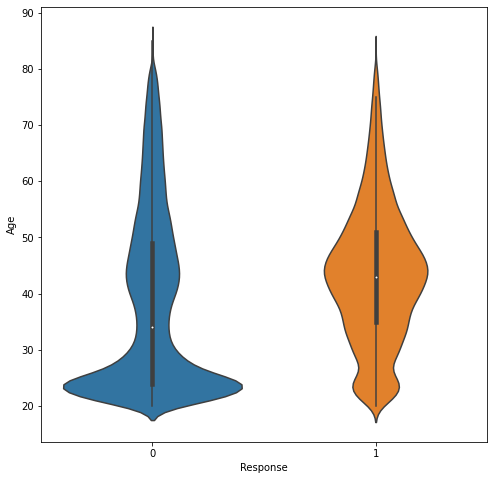

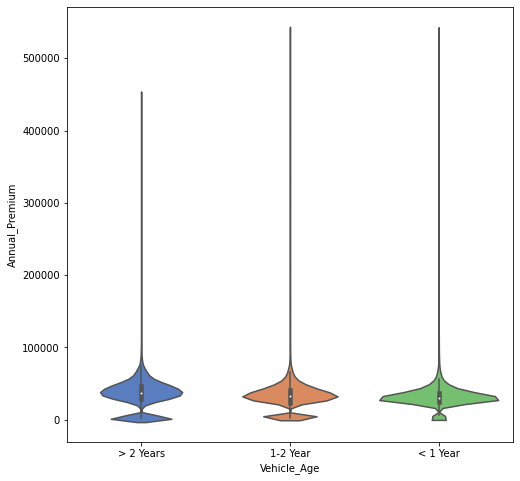

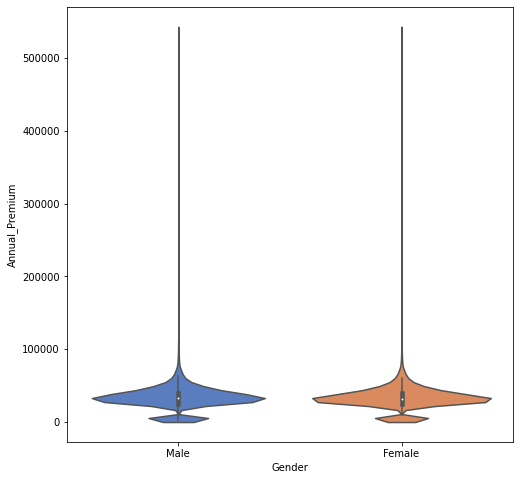

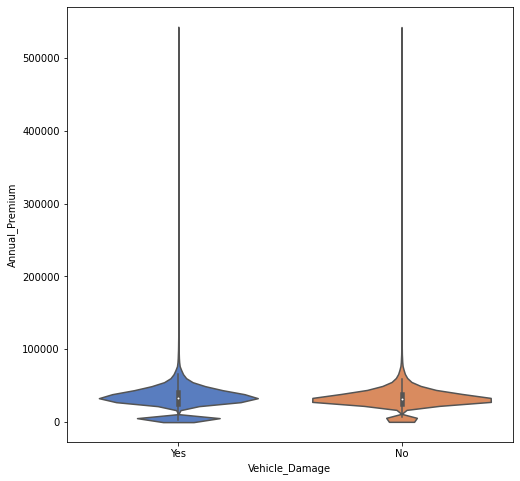

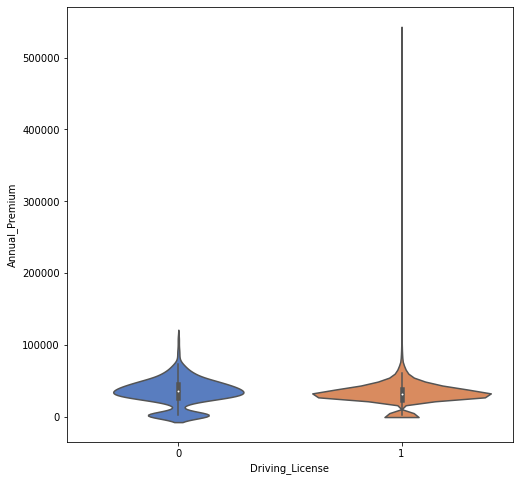

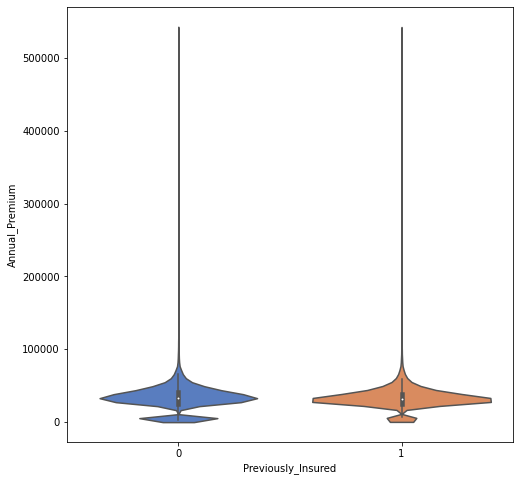

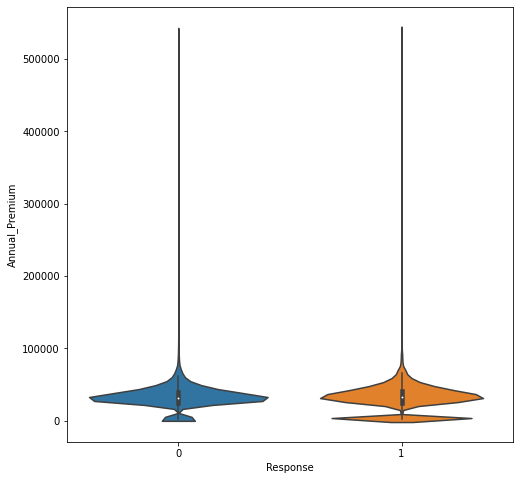

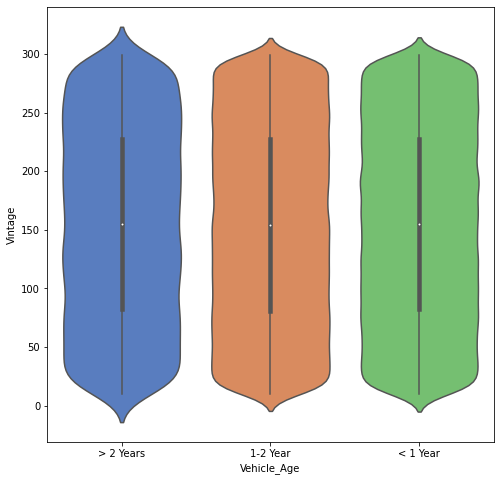

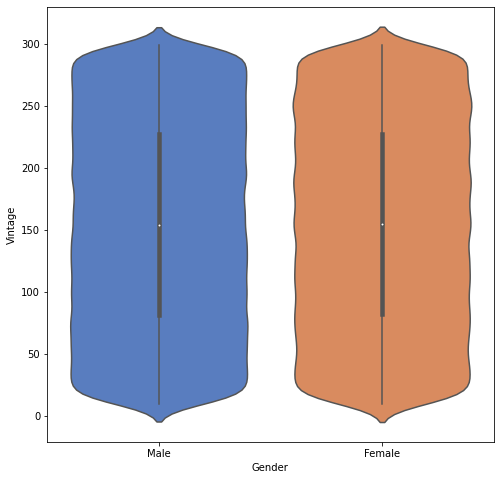

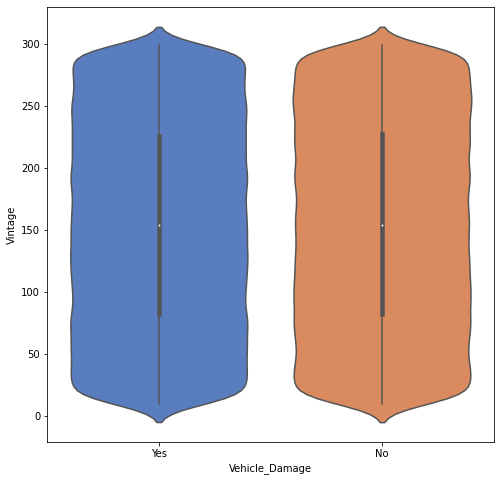

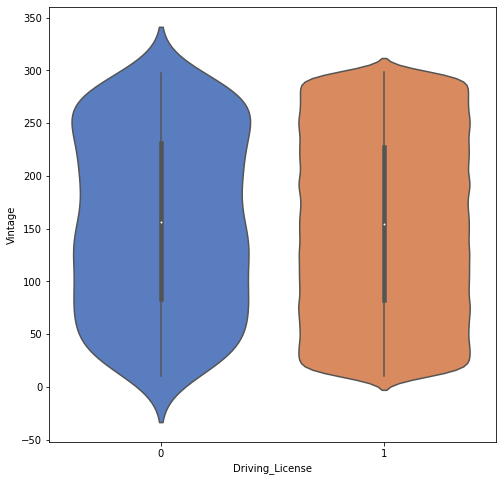

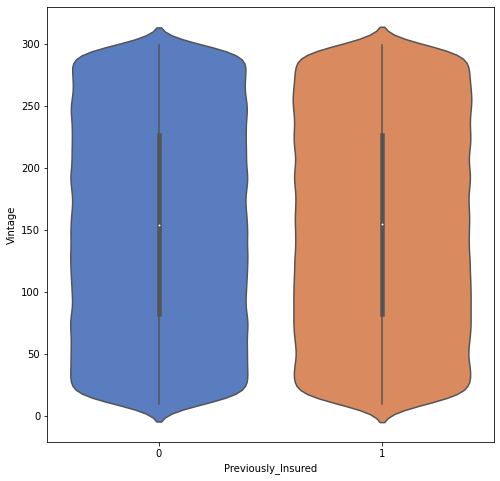

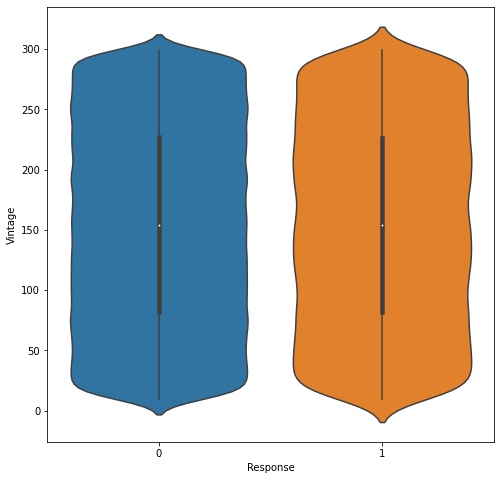

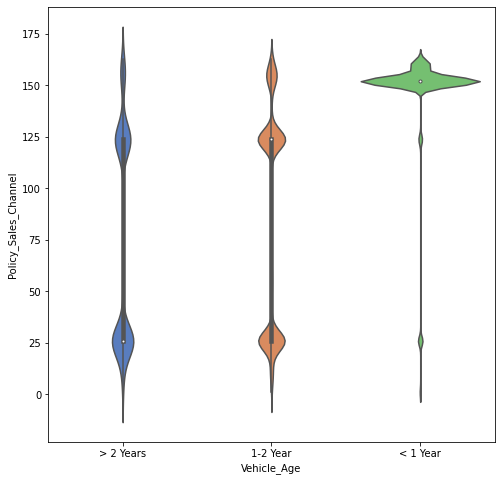

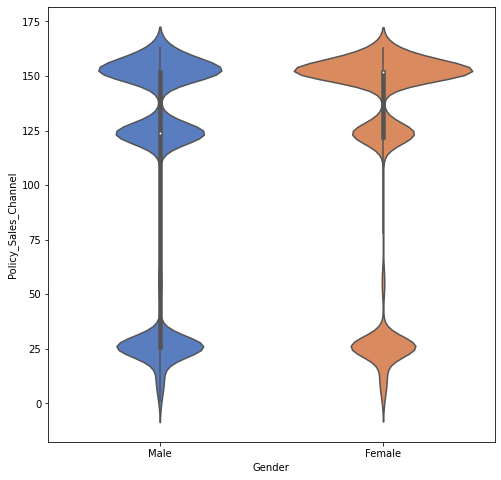

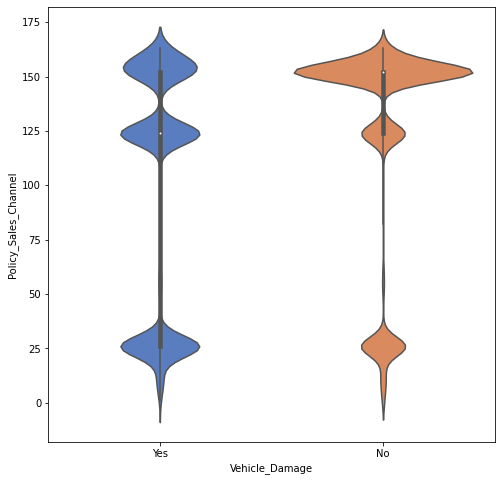

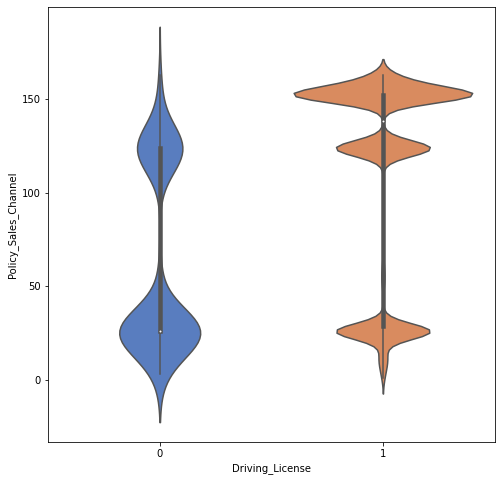

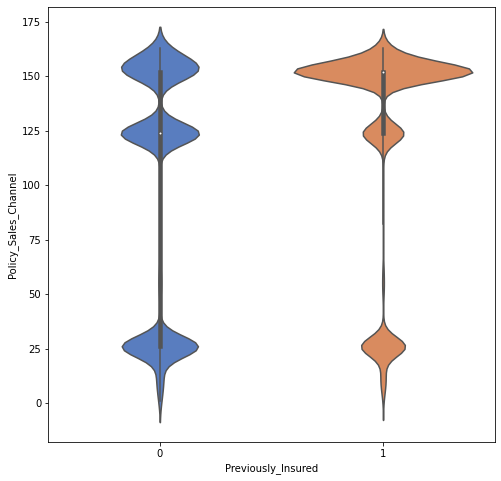

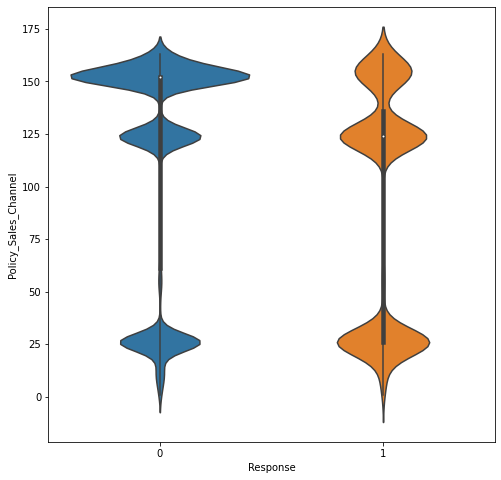

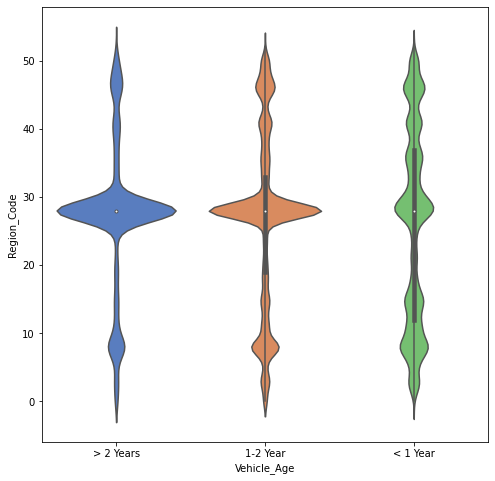

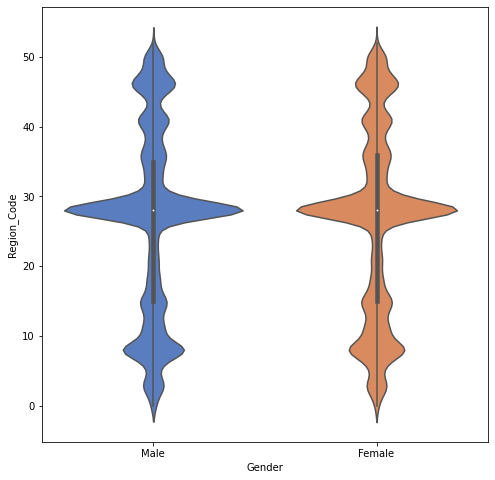

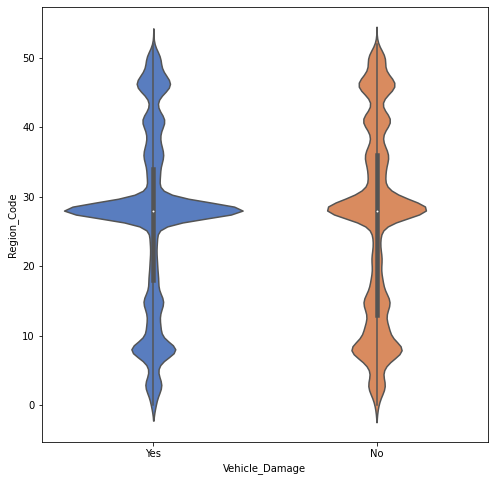

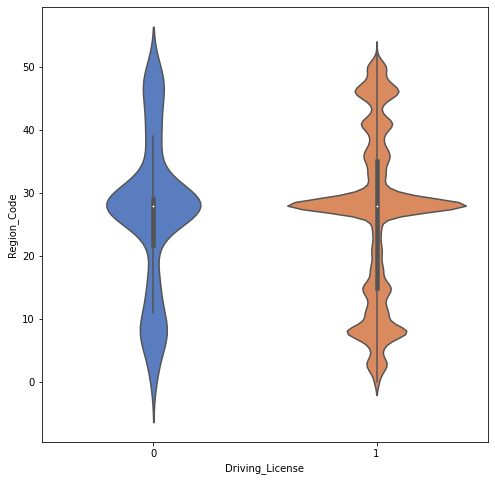

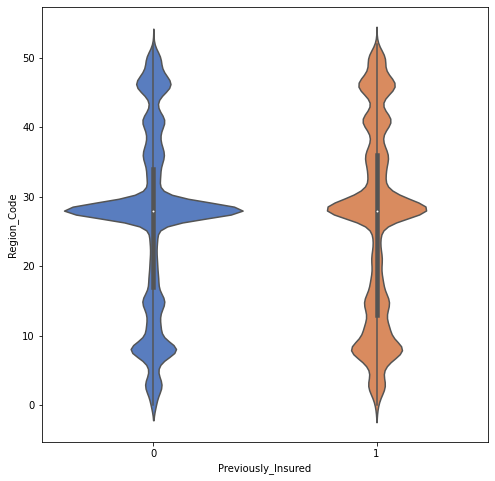

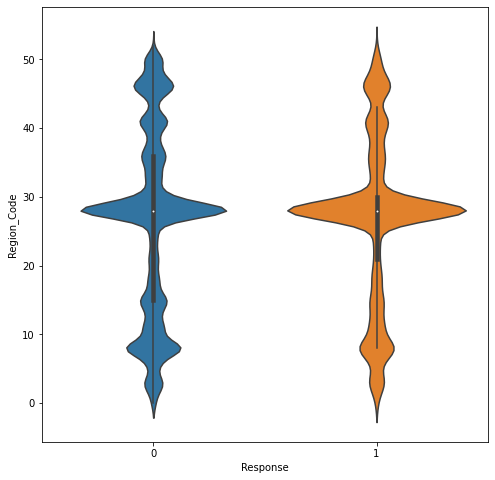

In [29]:
for num in numeric_features:
  for cat in cat_features:
    if cat!= 'Response':
      plt.figure(figsize = (8,8))
      sns.violinplot(x=cat, y = num, data= df, palette = 'muted' )
    else:
      plt.figure(figsize = (8,8))
      sns.violinplot(x=cat, y = num, data= df )
      plt.show()

In the violin plots with policy_sales_channel we can notice that the populations are dense in three specific regions alone regardless of the categories. Given that the nature of the feature is in itself categorical, we can bin this based on its population distribution.

Similarly, Region_Code exhibits this feature. The waves are wider in the same regions. Which could also be binned

#Feature Engineering

## Outlier Treatment

### Numerical Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


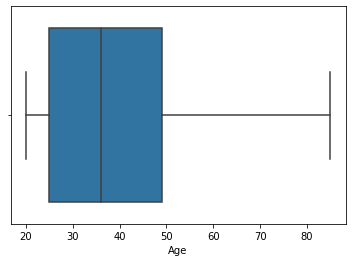

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


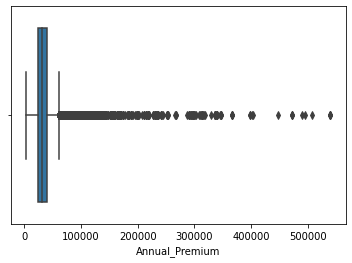

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


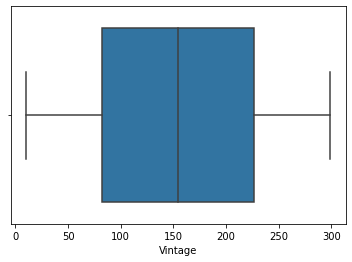

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


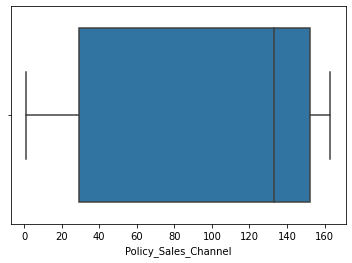

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


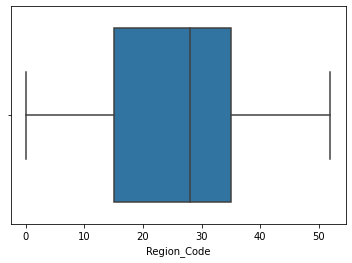

In [30]:
for feature in numeric_features:
  sns.boxplot(df[feature])
  plt.show()

In [31]:
for ftr in numeric_features: 
  print(ftr,'\n')
  q25, q75 = np.percentile(df[ftr], 25), np.percentile(df[ftr], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:
    
    def label(row):
      if row[ftr] > upper: 
        return 1
      if row[ftr] < lower:
        return 1
      else:
        return 0

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]
    
    df[ftr + '_Outlier'] =  df.apply (lambda row: label(row), axis=1)
    df[ftr ] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Age 

Percentiles: 25th=25.000, 75th=49.000, IQR=24.000
Identified outliers: 0

-------

Annual_Premium 

Percentiles: 25th=24405.000, 75th=39400.000, IQR=14995.000
Identified outliers: 10320
Annual_Premium Outliers Removed

-------

Vintage 

Percentiles: 25th=82.000, 75th=227.000, IQR=145.000
Identified outliers: 0

-------

Policy_Sales_Channel 

Percentiles: 25th=29.000, 75th=152.000, IQR=123.000
Identified outliers: 0

-------

Region_Code 

Percentiles: 25th=15.000, 75th=35.000, IQR=20.000
Identified outliers: 0

-------



### Detecting Multicolinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

VIF              variable
0  5.154515                   Age
1  4.221447        Annual_Premium
2  4.004905               Vintage
3  3.669516  Policy_Sales_Channel
4  4.457084           Region_Code

### Binning Numerical Feature into Cat

Policy_Sales_Channel and Region_Code binned Based on Violin Plot Distribution

In [33]:
a = {
    'col': [],
     'item':[],
     'percent':[]
}
for item in df['Policy_Sales_Channel'].unique():
  percent = 100*len(df[df['Policy_Sales_Channel']==item])/df.shape[0]
  a['col'].append('Policy_Sales_Channel')
  a['item'].append(item)
  a['percent'].append(percent)

for item in df['Region_Code'].unique():
  percent = 100*len(df[df['Region_Code']==item])/df.shape[0]
  a['col'].append('Region_Code')
  a['item'].append(item)
  a['percent'].append(percent)

a = pd.DataFrame(a)
pc_table = (a[a.col == 'Policy_Sales_Channel'])
rc_table = (a[a.col == 'Region_Code'])

In [34]:
[len(pc_table),
 len(pc_table[pc_table.percent > 5]),
len(pc_table[pc_table.percent <= 5]),
len(pc_table[pc_table.percent <= 3]),
len(pc_table[pc_table.percent <= 1]) ]

[155, 4, 151, 151, 146]

In [35]:
pc_table[pc_table.percent > 5]

col   item    percent
0  Policy_Sales_Channel   26.0  20.912652
1  Policy_Sales_Channel  152.0  35.366260
2  Policy_Sales_Channel  160.0   5.714638
3  Policy_Sales_Channel  124.0  19.415705

In [36]:
[len(rc_table),
 len(rc_table[rc_table.percent >5 ]),
len(rc_table[rc_table.percent <= 5]),
len(rc_table[rc_table.percent <= 3]),
len(rc_table[rc_table.percent <= 1]),]

[53, 3, 50, 47, 28]

In [37]:
rc_table[rc_table.percent > 5]

col  item    percent
155  Region_Code  28.0  27.922458
165  Region_Code   8.0   8.889058
181  Region_Code  46.0   5.181982

In [38]:
df_dupe = df.copy()
for ftr in ['Policy_Sales_Channel','Region_Code']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df_dupe[ftr].unique():
    if len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0] < 0.05: #categories with less than 1% occurence are binned together
      print(f"Feature:{ftr} Item:{item}   % Found {len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0]} \n ")
      df_dupe[ftr].replace(item, 'Rare', inplace = True)

--------
Column:Policy_Sales_Channel 

Feature:Policy_Sales_Channel Item:14.0   % Found 0.0016320790115163903 
 
Feature:Policy_Sales_Channel Item:13.0   % Found 0.004893613113308791 
 
Feature:Policy_Sales_Channel Item:30.0   % Found 0.003699728948935869 
 
Feature:Policy_Sales_Channel Item:156.0   % Found 0.0279736243436917 
 
Feature:Policy_Sales_Channel Item:163.0   % Found 0.007591004148419481 
 
Feature:Policy_Sales_Channel Item:157.0   % Found 0.017538289570700246 
 
Feature:Policy_Sales_Channel Item:122.0   % Found 0.026055537916973882 
 
Feature:Policy_Sales_Channel Item:19.0   % Found 0.0005825105153643708 
 
Feature:Policy_Sales_Channel Item:22.0   % Found 0.0008711418518061762 
 
Feature:Policy_Sales_Channel Item:15.0   % Found 0.0023300420614574833 
 
Feature:Policy_Sales_Channel Item:154.0   % Found 0.015725159993597634 
 
Feature:Policy_Sales_Channel Item:16.0   % Found 0.0013723108087187654 
 
Feature:Policy_Sales_Channel Item:52.0   % Found 0.0027682369086009513 
 
Fea

In [39]:
crosstab, test_results, expected = rp.crosstab(df['Policy_Sales_Channel'], df['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

Chi-square test     results
0  Pearson Chi-square ( 154.0) =   26447.0329
1                      p-value =       0.0000
2                   Cramer's V =       0.2634

Policy_Sales_Channel after binning shows very strong association to targer response

In [40]:
crosstab, test_results, expected = rp.crosstab(df['Region_Code'], df['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

Chi-square test    results
0  Pearson Chi-square ( 52.0) =   7267.8425
1                     p-value =      0.0000
2                  Cramer's V =      0.1381

Region_code shows moderate association to target variable

In [41]:
for ftr in ['Policy_Sales_Channel','Region_Code']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df[ftr].unique():
    if len(df[df[ftr]==item])/df.shape[0] < 0.05: #categories with less than 1% occurence are binned together
      print(f"Feature:{ftr} Item:{item}   % Found {len(df[df[ftr]==item])/df.shape[0]} \n ")
      df[ftr].replace(item, 'Rare', inplace = True)

--------
Column:Policy_Sales_Channel 

Feature:Policy_Sales_Channel Item:14.0   % Found 0.0016320790115163903 
 
Feature:Policy_Sales_Channel Item:13.0   % Found 0.004893613113308791 
 
Feature:Policy_Sales_Channel Item:30.0   % Found 0.003699728948935869 
 
Feature:Policy_Sales_Channel Item:156.0   % Found 0.0279736243436917 
 
Feature:Policy_Sales_Channel Item:163.0   % Found 0.007591004148419481 
 
Feature:Policy_Sales_Channel Item:157.0   % Found 0.017538289570700246 
 
Feature:Policy_Sales_Channel Item:122.0   % Found 0.026055537916973882 
 
Feature:Policy_Sales_Channel Item:19.0   % Found 0.0005825105153643708 
 
Feature:Policy_Sales_Channel Item:22.0   % Found 0.0008711418518061762 
 
Feature:Policy_Sales_Channel Item:15.0   % Found 0.0023300420614574833 
 
Feature:Policy_Sales_Channel Item:154.0   % Found 0.015725159993597634 
 
Feature:Policy_Sales_Channel Item:16.0   % Found 0.0013723108087187654 
 
Feature:Policy_Sales_Channel Item:52.0   % Found 0.0027682369086009513 
 
Fea

In [42]:
df = pd.concat([pd.get_dummies(df['Policy_Sales_Channel'],prefix = 'Policy_Sales_Channel'), df.drop('Policy_Sales_Channel', axis = 1)], axis =1)
df = pd.concat([pd.get_dummies(df['Region_Code'],prefix = 'Region_Code'), df.drop('Region_Code', axis = 1)], axis =1)
df

Region_Code_8.0  Region_Code_28.0  Region_Code_46.0  Region_Code_Rare  \
0                     0                 1                 0                 0   
1                     0                 0                 0                 1   
2                     0                 1                 0                 0   
3                     0                 0                 0                 1   
4                     0                 0                 0                 1   
...                 ...               ...               ...               ...   
381104                0                 0                 0                 1   
381105                0                 0                 0                 1   
381106                0                 0                 0                 1   
381107                0                 0                 0                 1   
381108                0                 0                 0                 1   

        Policy_Sales_Channel_26.0  Policy_Sales_Channel_124.0  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
381104                          1                           0   
381105                          0                           0   
381106                          0                           0   
381107                          0                           1   
381108                          1                           0   

        Policy_Sales_Channel_152.0  Policy_Sales_Channel_160.0  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                1                           0   
4                                1                           0   
...                            ...                         ...   
381104                           0                           0   
381105                           1                           0   
381106                           0                           1   
381107                           0                           0   
381108                           0                           0   

        Policy_Sales_Channel_Rare  Gender  Age  Driving_License  \
0                               0    Male   44                1   
1                               0    Male   76                1   
2                               0    Male   47                1   
3                               0    Male   21                1   
4                               0  Female   29                1   
...                           ...     ...  ...              ...   
381104                          0    Male   74                1   
381105                          0    Male   30                1   
381106                          0    Male   21                1   
381107                          0  Female   68                1   
381108                          0    Male   46                1   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 Years            Yes         40454.0   
1                        0    1-2 Year             No         33536.0   
2                        0   > 2 Years            Yes         38294.0   
3                        1    < 1 Year             No         28619.0   
4                        1    < 1 Year             No         27496.0   
...                    ...         ...            ...             ...   
381104                   1    1-2 Year             No         30170.0   
381105                   1    < 1 Year             No         40016.0   

### Handling Rare Categorical Variables

In [43]:
for ftr in cat_features:
  print(f"--------\nColumn:{ftr} \n")
  for item in df[ftr].unique():
    if len(df[df[ftr]==item])/df.shape[0] < 0.01: #categories with less than 1% occurence are binned together
      print(f"Item:{item}   % Found {len(df[df[ftr]==item])/df.shape[0]} \n ")

--------
Column:Vehicle_Age 

--------
Column:Gender 

--------
Column:Vehicle_Damage 

--------
Column:Driving_License 

Item:0   % Found 0.0021306240471885996 
 
--------
Column:Previously_Insured 

--------
Column:Response 



In [44]:
for ftr in cat_features:
  print(ftr,f"Unique Values: {df[ftr].unique()}\n")

Vehicle_Age Unique Values: ['> 2 Years' '1-2 Year' '< 1 Year']

Gender Unique Values: ['Male' 'Female']

Vehicle_Damage Unique Values: ['Yes' 'No']

Driving_License Unique Values: [1 0]

Previously_Insured Unique Values: [0 1]

Response Unique Values: [1 0]



## Encoding Categorical Features

In [45]:
cat_label_features

['Vehicle_Age', 'Gender', 'Vehicle_Damage']

Encoding Column Vehicle Age ordinally

In [46]:
cleanup_nums = {"Vehicle_Age":    {'> 2 Years':2, '1-2 Year':1, '< 1 Year':0},
                "Gender": {'Male':0, 'Female':1},
                "Vehicle_Damage":{'Yes':1, 'No':0}
                }
df.replace(cleanup_nums, inplace = True)                

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Region_Code_8.0             381109 non-null  uint8  
 1   Region_Code_28.0            381109 non-null  uint8  
 2   Region_Code_46.0            381109 non-null  uint8  
 3   Region_Code_Rare            381109 non-null  uint8  
 4   Policy_Sales_Channel_26.0   381109 non-null  uint8  
 5   Policy_Sales_Channel_124.0  381109 non-null  uint8  
 6   Policy_Sales_Channel_152.0  381109 non-null  uint8  
 7   Policy_Sales_Channel_160.0  381109 non-null  uint8  
 8   Policy_Sales_Channel_Rare   381109 non-null  uint8  
 9   Gender                      381109 non-null  int64  
 10  Age                         381109 non-null  int64  
 11  Driving_License             381109 non-null  int64  
 12  Previously_Insured          381109 non-null  int64  
 13  Vehicle_Age   

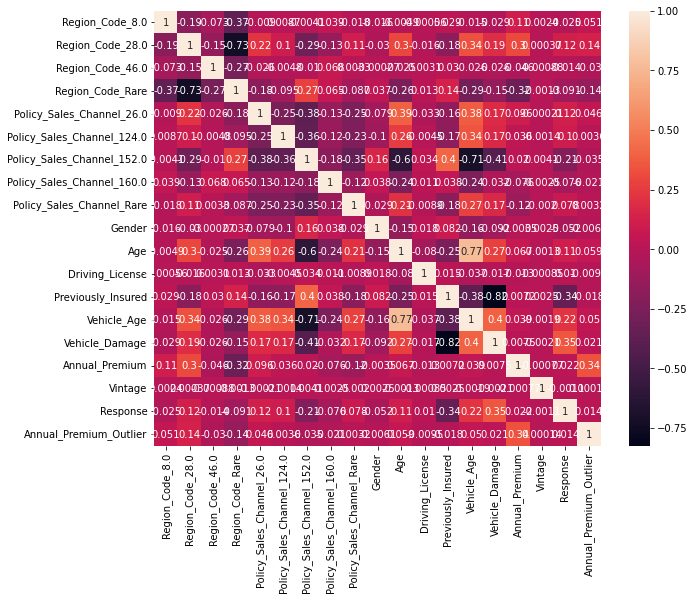

In [48]:
plt.figure(figsize = (10,8
                      ))
sns.heatmap(df.corr(), annot = True)

In [49]:
X, y = df.drop(['Response'],axis=1), df['Response']

In [50]:
X.to_csv('Cleaned_X.csv')
y.to_csv('Cleaned_y.csv')

##Functions

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify = y , random_state=5)

In [53]:
#function to scale
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled


### Dimensionality Reduction: PCA

In [54]:
from sklearn.decomposition import PCA
#function to reduce dimension
def do_PCA(X_train,y_train,X_test, y_test, n_components = 13):

  #X_train, y_train, X_test, y_test, n_components

  pca = PCA(n_components)
  pca.fit(X_train, y_train)
  X_train_PCA = pca.transform(X_train)
  X_test_PCA = pca.transform(X_test)

  exp_var_pca = pca.explained_variance_ratio_
  cum_sum_eigenvalues = np.cumsum(exp_var_pca)

  plt.figure(figsize = (10,8))
  plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
  plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
  plt.yticks(ticks = np.arange(0,1,0.05))
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal component index')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()
  columns = [ f"PCA{i}" for i in np.arange(1,n_components +1,1) ]
  X_train_PCA = pd.DataFrame(X_train_PCA, columns = columns )
  X_test_PCA = pd.DataFrame(X_test_PCA, columns = columns)

  return X_train_PCA, X_test_PCA


### Sampling



In [55]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

def do_sampling(X,y, sample_type, categorical_feature_index = None):
  if sample_type != SMOTENC :
    sampler = sample_type()
  else:
    sampler = sample_type(categorical_features= categorical_feature_index)
  # transform the dataset
  return sampler.fit_resample(X, y)


In [56]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, recall_score , confusion_matrix
from sklearn.metrics import roc_curve, auc, fbeta_score, precision_score, matthews_corrcoef, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.naive_bayes import  MultinomialNB, BernoulliNB,GaussianNB #do partial fit dirst
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score

In [63]:
report = {
    'Sampling':[],
    'model_name':[],
    'TP':[],
    'FP':[],
    'TN':[],
    'FN':[],
    'accuracy':[],
    'balanced_accuracy':[],
    'recall':[],
    'precision':[],
    'f1':[],
    'f0.5':[],
    'f2.0':[],
    'roc_auc' : []
}
# function to evaluate and update model and score
def evaluate(technique,modelname, Model, X_train, y_train, X_test, y_test):
  
  if modelname in report['model_name']:
    print("Prexisting Model")
    return 0
  X_tr = X_train.copy()
  X_te = X_test.copy()

  print(f"\nTraining {str(Model)} ...")
  Model.fit(X_tr, y_train)

  print(f"\nPredicting{str(Model)} scores ...")

  y_pred = Model.predict(X_te)

  f1 = f1_score(y_test,y_pred)
  report['f1'].append(f1)

  precision = precision_score(y_test,y_pred)
  report['precision'].append(precision)

  recall = recall_score(y_test,y_pred)
  report['recall'].append(recall)

  acc = accuracy_score(y_test,y_pred)
  report['accuracy'].append(acc)


  blacc = balanced_accuracy_score(y_test,y_pred)
  report['balanced_accuracy'].append(blacc)

  tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
  report['TN'].append(tn)
  report['FN'].append(fn)
  report['TP'].append(tp)
  report['FP'].append(fp)


  f_05 = fbeta_score(y_test,y_pred,beta = 0.5)
  report['f0.5'].append(f_05)

  f_2 = fbeta_score(y_test,y_pred,beta = 2.0)
  report['f2.0'].append(f_2)

  roc_auc = roc_auc_score(y_test,y_pred)
  report['roc_auc'].append(roc_auc)



  report['Sampling'].append(technique)
  report['model_name'].append(modelname)


  print(f"\n\n {str(Model)}ConfusionMatrix \n {confusion_matrix(y_test,y_pred)}\n{roc_curve(y_test,y_pred)}")
  



In [58]:
#displays report in a dataframe
def display_report():
  return pd.DataFrame(report)

# Sampling and Model Evaluation

 

 Linear Algorithm


*   Logistic Regression

Non Linear Algorithm
* Decision Tree
* k-Nearest Neighbours
* SVM

Ensemble Algorithm
* Random Forest
* Bagged Decision Trees
* Stochastic Gradient Boosting





In [59]:
# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LogisticRegression')

  # DecisionTreeClassifier
  models.append((DecisionTreeClassifier()))
  names.append('DecisionTree Classifier')
  #RandomForestClassifier
  models.append(RandomForestClassifier())
  names.append('RandomForest Classifier')

  # GradientBoostingClassifier
  models.append(GradientBoostingClassifier())
  names.append('GradientBoosting Classifier')

  #BaggingClassifier
  models.append(BaggingClassifier())
  names.append('Bagging Classifier')

  # GNB
  models.append(GaussianNB())
  names.append('Gaussian NaiveBayes')

  # MNB
  models.append(MultinomialNB())
  names.append('Multinomial Bayes')

  # MNB
  models.append(BernoulliNB())
  names.append('Bernoulli Bayes')


  return models, names

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304887, 18), (76222, 18), (304887,), (76222,))

###Scaling

In [61]:
X_train_scaled, X_test_scaled = do_scale(X_train, X_test,scaling_type = MinMaxScaler)

### Evaluating Models

In [64]:
models, names = get_models()
for i in range(len(models)):
  evaluate("None", names[i], models[i],X_train_scaled, y_train, X_test_scaled,y_test)


Training LogisticRegression() ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[66876     4]
 [ 9341     1]]
(array([0.00000000e+00, 5.98086124e-05, 1.00000000e+00]), array([0.0000000e+00, 1.0704346e-04, 1.0000000e+00]), array([2, 1, 0]))

Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[59963  6917]
 [ 6538  2804]]
(array([0.        , 0.10342404, 1.        ]), array([0.        , 0.30014986, 1.        ]), array([2, 1, 0]))

Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[63926  2954]
 [ 7839  1503]]
(array([0.        , 0.04416866, 1.        ]), array([0.        , 0.16088632, 1.        ]), array([2, 1, 0]))

Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 GradientBoostingClassifier()ConfusionMatrix 
 [[66880     0]
 [ 9342     0]]
(array([0., 1.]), array([0., 1.]), array([1, 0]))

Training BaggingClassifier() ...

PredictingBaggingClassifier() scores ...


 BaggingClassifier()ConfusionMatrix 
 [[64066  2814]
 [ 7970  1372]]
(array([0.        , 0.04207536, 1.        ]), array([0.        , 0.14686363, 1.        ]), array([2, 1, 0]))

Training GaussianNB() ...

PredictingGaussianNB() scores ...


 GaussianNB()ConfusionMatrix 
 [[46022 20858]
 [  989  8353]]
(array([0.        , 0.31187201, 1.        ]), array([0.        , 0.89413402, 1.        ]), array([2, 1, 0]))

Training MultinomialNB() ...

PredictingMultinomialNB() scores ...


 MultinomialNB()ConfusionMatrix 
 [[63247  3633]
 [ 7719  1623]]
(array([0.        , 0.05432117, 1.        ]), array([0.        , 0.17373154, 1.        ]), array([2, 1, 0]))

Training BernoulliNB() ...

PredictingBernoulliNB() scores ...


 BernoulliNB()ConfusionMatrix 
 [[48497 18383]
 [ 1968  7374]]
(array

In [65]:
display_report()

Sampling                   model_name    TP     FP     TN    FN  accuracy  \
0     None           LogisticRegression     1      4  66876  9341  0.877398   
1     None      DecisionTree Classifier  2804   6917  59963  6538  0.823476   
2     None      RandomForest Classifier  1503   2954  63926  7839  0.858400   
3     None  GradientBoosting Classifier     0      0  66880  9342  0.877437   
4     None           Bagging Classifier  1372   2814  64066  7970  0.858519   
5     None          Gaussian NaiveBayes  8353  20858  46022   989  0.713377   
6     None            Multinomial Bayes  1623   3633  63247  7719  0.851067   
7     None              Bernoulli Bayes  7374  18383  48497  1968  0.733004   

   balanced_accuracy    recall  precision        f1      f0.5      f2.0  \
0           0.500024  0.000107   0.200000  0.000214  0.000534  0.000134   
1           0.598363  0.300150   0.288448  0.294182  0.290715  0.297734   
2           0.558359  0.160886   0.337222  0.217842  0.276592  0.179677   
3           0.500000  0.000000   0.000000  0.000000  0.000000  0.000000   
4           0.552394  0.146864   0.327759  0.202839  0.262976  0.165086   
5           0.791131  0.894134   0.285954  0.433326  0.330980  0.627300   
6           0.559705  0.173732   0.308790  0.222359  0.267240  0.190386   
7           0.757237  0.789338   0.286291  0.420183  0.328112  0.584079   

    roc_auc  
0  0.500024  
1  0.598363  
2  0.558359  
3  0.500000  
4  0.552394  
5  0.791131  
6  0.559705  
7  0.757237

###Performing Sampling Techniques

####OverSampling SMOTE


In [66]:
X_smote, y_smote = do_sampling(X_train_scaled, y_train, SMOTE)

In [67]:
X_smote.shape, y_smote.shape

((535038, 18), (535038,))

In [68]:
models, names = get_models()
for i in range(len(models)):
  evaluate("SMOTE Sampling", "SMOTE "+ names[i],models[i],X_smote, y_smote, X_test_scaled,y_test)



Training LogisticRegression() ...

PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[42272 24608]
 [  479  8863]]
(array([0.        , 0.36794258, 1.        ]), array([0.        , 0.94872618, 1.        ]), array([2, 1, 0]))

Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[59341  7539]
 [ 6331  3011]]
(array([0.        , 0.11272428, 1.        ]), array([0.        , 0.32230786, 1.        ]), array([2, 1, 0]))

Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[57831  9049]
 [ 5279  4063]]
(array([0.        , 0.13530203, 1.        ]), array([0.        , 0.43491758, 1.        ]), array([2, 1, 0]))

Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


 GradientBoostingClassifier()ConfusionMatrix 
 [[46408 20472]
 [ 1043  8299]]
(array([0.        , 0.306

In [69]:
display_report()

Sampling                         model_name    TP     FP     TN  \
0             None                 LogisticRegression     1      4  66876   
1             None            DecisionTree Classifier  2804   6917  59963   
2             None            RandomForest Classifier  1503   2954  63926   
3             None        GradientBoosting Classifier     0      0  66880   
4             None                 Bagging Classifier  1372   2814  64066   
5             None                Gaussian NaiveBayes  8353  20858  46022   
6             None                  Multinomial Bayes  1623   3633  63247   
7             None                    Bernoulli Bayes  7374  18383  48497   
8   SMOTE Sampling           SMOTE LogisticRegression  8863  24608  42272   
9   SMOTE Sampling      SMOTE DecisionTree Classifier  3011   7539  59341   
10  SMOTE Sampling      SMOTE RandomForest Classifier  4063   9049  57831   
11  SMOTE Sampling  SMOTE GradientBoosting Classifier  8299  20472  46408   
12  SMOTE Sampling           SMOTE Bagging Classifier  2155   4792  62088   
13  SMOTE Sampling          SMOTE Gaussian NaiveBayes  8478  21658  45222   
14  SMOTE Sampling            SMOTE Multinomial Bayes  8443  23348  43532   
15  SMOTE Sampling              SMOTE Bernoulli Bayes  8328  20824  46056   

      FN  accuracy  balanced_accuracy    recall  precision        f1  \
0   9341  0.877398           0.500024  0.000107   0.200000  0.000214   
1   6538  0.823476           0.598363  0.300150   0.288448  0.294182   
2   7839  0.858400           0.558359  0.160886   0.337222  0.217842   
3   9342  0.877437           0.500000  0.000000   0.000000  0.000000   
4   7970  0.858519           0.552394  0.146864   0.327759  0.202839   
5    989  0.713377           0.791131  0.894134   0.285954  0.433326   
6   7719  0.851067           0.559705  0.173732   0.308790  0.222359   
7   1968  0.733004           0.757237  0.789338   0.286291  0.420183   
8    479  0.670869           0.790392  0.948726   0.264796  0.414033   
9   6331  0.818032           0.604792  0.322308   0.285403  0.302735   
10  5279  0.812023           0.649808  0.434918   0.309869  0.361895   
11  1043  0.717732           0.791127  0.888354   0.288450  0.435494   
12  7187  0.842841           0.579514  0.230679   0.310206  0.264596   
13   864  0.704521           0.791840  0.907514   0.281325  0.429505   
14   899  0.681890           0.777333  0.903768   0.265578  0.410522   
15  1014  0.713495           0.790047  0.891458   0.285675  0.432691   

        f0.5      f2.0   roc_auc  
0   0.000534  0.000134  0.500024  
1   0.290715  0.297734  0.598363  
2   0.276592  0.179677  0.558359  
3   0.000000  0.000000  0.500000  
4   0.262976  0.165086  0.552394  
5   0.330980  0.627300  0.791131  
6   0.267240  0.190386  0.559705  
7   0.328112  0.584079  0.757237  
8   0.309406  0.625573  0.790392  
9   0.292092  0.314183  0.604792  
10  0.328775  0.402437  0.649808  
11  0.333491  0.627391  0.791127  
12  0.290197  0.243146  0.579514  
13  0.326363  0.627963  0.791840  
14  0.309254  0.610405  0.777333  
15  0.330607  0.625977  0.790047

#### UnderSampling : Tomek Links

In [70]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

In [71]:
X_tomek, y_tomek = do_sampling(X_train_scaled, y_train, TomekLinks)

In [72]:
X_tomek.shape, y_tomek.shape

((289763, 18), (289763,))

In [73]:
models, names = get_models()
for i in range(len(models)):
  evaluate("Tomek Under Sampling", "Tomek " + names[i],models[i],X_tomek, y_tomek, X_test_scaled,y_test)



Training LogisticRegression() ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[66781    99]
 [ 9304    38]]
(array([0.        , 0.00148026, 1.        ]), array([0.        , 0.00406765, 1.        ]), array([2, 1, 0]))

Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[58908  7972]
 [ 6028  3314]]
(array([0.        , 0.11919856, 1.        ]), array([0.        , 0.35474203, 1.        ]), array([2, 1, 0]))

Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[62229  4651]
 [ 6969  2373]]
(array([0.        , 0.06954246, 1.        ]), array([0.        , 0.25401413, 1.        ]), array([2, 1, 0]))

Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


 GradientBoostingClassifier()ConfusionMatrix 
 [[66743   137]
 [ 9202   140]]
(array([0.        , 0.00204844, 1.        ]), array([0.     

In [74]:
display_report()

Sampling                         model_name    TP     FP  \
0                   None                 LogisticRegression     1      4   
1                   None            DecisionTree Classifier  2804   6917   
2                   None            RandomForest Classifier  1503   2954   
3                   None        GradientBoosting Classifier     0      0   
4                   None                 Bagging Classifier  1372   2814   
5                   None                Gaussian NaiveBayes  8353  20858   
6                   None                  Multinomial Bayes  1623   3633   
7                   None                    Bernoulli Bayes  7374  18383   
8         SMOTE Sampling           SMOTE LogisticRegression  8863  24608   
9         SMOTE Sampling      SMOTE DecisionTree Classifier  3011   7539   
10        SMOTE Sampling      SMOTE RandomForest Classifier  4063   9049   
11        SMOTE Sampling  SMOTE GradientBoosting Classifier  8299  20472   
12        SMOTE Sampling           SMOTE Bagging Classifier  2155   4792   
13        SMOTE Sampling          SMOTE Gaussian NaiveBayes  8478  21658   
14        SMOTE Sampling            SMOTE Multinomial Bayes  8443  23348   
15        SMOTE Sampling              SMOTE Bernoulli Bayes  8328  20824   
16  Tomek Under Sampling           Tomek LogisticRegression    38     99   
17  Tomek Under Sampling      Tomek DecisionTree Classifier  3314   7972   
18  Tomek Under Sampling      Tomek RandomForest Classifier  2373   4651   
19  Tomek Under Sampling  Tomek GradientBoosting Classifier   140    137   
20  Tomek Under Sampling           Tomek Bagging Classifier  2029   4128   
21  Tomek Under Sampling          Tomek Gaussian NaiveBayes  8353  20862   
22  Tomek Under Sampling            Tomek Multinomial Bayes  2948   7069   
23  Tomek Under Sampling              Tomek Bernoulli Bayes  7913  19614   

       TN    FN  accuracy  balanced_accuracy    recall  precision        f1  \
0   66876  9341  0.877398           0.500024  0.000107   0.200000  0.000214   
1   59963  6538  0.823476           0.598363  0.300150   0.288448  0.294182   
2   63926  7839  0.858400           0.558359  0.160886   0.337222  0.217842   
3   66880  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
4   64066  7970  0.858519           0.552394  0.146864   0.327759  0.202839   
5   46022   989  0.713377           0.791131  0.894134   0.285954  0.433326   
6   63247  7719  0.851067           0.559705  0.173732   0.308790  0.222359   
7   48497  1968  0.733004           0.757237  0.789338   0.286291  0.420183   
8   42272   479  0.670869           0.790392  0.948726   0.264796  0.414033   
9   59341  6331  0.818032           0.604792  0.322308   0.285403  0.302735   
10  57831  5279  0.812023           0.649808  0.434918   0.309869  0.361895   
11  46408  1043  0.717732           0.791127  0.888354   0.288450  0.435494   
12  62088  7187  0.842841           0.579514  0.230679   0.310206  0.264596   
13  45222   864  0.704521           0.791840  0.907514   0.281325  0.429505   
14  43532   899  0.681890           0.777333  0.903768   0.265578  0.410522   
15  46056  1014  0.713495           0.790047  0.891458   0.285675  0.432691   
16  66781  9304  0.876637           0.501294  0.004068   0.277372  0.008018   
17  58908  6028  0.816326           0.617772  0.354742   0.293638  0.321311   
18  62229  6969  0.847551           0.592236  0.254014   0.337842  0.289991   
19  66743  9202  0.877476           0.506469  0.014986   0.505415  0.029109   
20  62752  7313  0.849899           0.577734  0.217191   0.329544  0.261823   
21  46018   989  0.713324           0.791101  0.894134   0.285915  0.433281   
22  59811  6394  0.823371           0.604934  0.315564   0.294300  0.304561   
23  47266  1429  0.723925           0.776882  0.847035   0.287463  0.429250   

        f0.5      f2.0   roc_auc  
0   0.000534  0.000134  0.500024  
1   0.290715  0.297734  0.598363  
2   0.276592  0.179677  0.558359  

#### Combination of Undersampling and oversampling

In [75]:
X_SMOTEENN, y_SMOTEENN = do_sampling(X_train_scaled, y_train, SMOTEENN)

In [76]:
X_SMOTEENN.shape, y_SMOTEENN.shape

((405004, 18), (405004,))

In [77]:
models, names = get_models()

for i in range(len(models)):
  evaluate("SMOTEENN Sampling", "SMOTEENN" + names[i],models[i],X_SMOTEENN, y_SMOTEENN, X_test_scaled, y_test)



Training LogisticRegression() ...

PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[41484 25396]
 [  347  8995]]
(array([0.        , 0.37972488, 1.        ]), array([0.        , 0.96285592, 1.        ]), array([2, 1, 0]))

Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[53250 13630]
 [ 3665  5677]]
(array([0.        , 0.20379785, 1.        ]), array([0.        , 0.60768572, 1.        ]), array([2, 1, 0]))

Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[49830 17050]
 [ 2086  7256]]
(array([0.        , 0.25493421, 1.        ]), array([0.        , 0.77670734, 1.        ]), array([2, 1, 0]))

Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


 GradientBoostingClassifier()ConfusionMatrix 
 [[44433 22447]
 [  698  8644]]
(array([0.        , 0.335

In [78]:
display_report()

Sampling                           model_name    TP     FP  \
0                   None                   LogisticRegression     1      4   
1                   None              DecisionTree Classifier  2804   6917   
2                   None              RandomForest Classifier  1503   2954   
3                   None          GradientBoosting Classifier     0      0   
4                   None                   Bagging Classifier  1372   2814   
5                   None                  Gaussian NaiveBayes  8353  20858   
6                   None                    Multinomial Bayes  1623   3633   
7                   None                      Bernoulli Bayes  7374  18383   
8         SMOTE Sampling             SMOTE LogisticRegression  8863  24608   
9         SMOTE Sampling        SMOTE DecisionTree Classifier  3011   7539   
10        SMOTE Sampling        SMOTE RandomForest Classifier  4063   9049   
11        SMOTE Sampling    SMOTE GradientBoosting Classifier  8299  20472   
12        SMOTE Sampling             SMOTE Bagging Classifier  2155   4792   
13        SMOTE Sampling            SMOTE Gaussian NaiveBayes  8478  21658   
14        SMOTE Sampling              SMOTE Multinomial Bayes  8443  23348   
15        SMOTE Sampling                SMOTE Bernoulli Bayes  8328  20824   
16  Tomek Under Sampling             Tomek LogisticRegression    38     99   
17  Tomek Under Sampling        Tomek DecisionTree Classifier  3314   7972   
18  Tomek Under Sampling        Tomek RandomForest Classifier  2373   4651   
19  Tomek Under Sampling    Tomek GradientBoosting Classifier   140    137   
20  Tomek Under Sampling             Tomek Bagging Classifier  2029   4128   
21  Tomek Under Sampling            Tomek Gaussian NaiveBayes  8353  20862   
22  Tomek Under Sampling              Tomek Multinomial Bayes  2948   7069   
23  Tomek Under Sampling                Tomek Bernoulli Bayes  7913  19614   
24     SMOTEENN Sampling           SMOTEENNLogisticRegression  8995  25396   
25     SMOTEENN Sampling      SMOTEENNDecisionTree Classifier  5677  13630   
26     SMOTEENN Sampling      SMOTEENNRandomForest Classifier  7256  17050   
27     SMOTEENN Sampling  SMOTEENNGradientBoosting Classifier  8644  22447   
28     SMOTEENN Sampling           SMOTEENNBagging Classifier  5774  12888   
29     SMOTEENN Sampling          SMOTEENNGaussian NaiveBayes  8664  22533   
30     SMOTEENN Sampling            SMOTEENNMultinomial Bayes  8505  23688   
31     SMOTEENN Sampling              SMOTEENNBernoulli Bayes  8447  22147   

       TN    FN  accuracy  balanced_accuracy    recall  precision        f1  \
0   66876  9341  0.877398           0.500024  0.000107   0.200000  0.000214   
1   59963  6538  0.823476           0.598363  0.300150   0.288448  0.294182   
2   63926  7839  0.858400           0.558359  0.160886   0.337222  0.217842   
3   66880  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
4   64066  7970  0.858519           0.552394  0.146864   0.327759  0.202839   
5   46022   989  0.713377           0.791131  0.894134   0.285954  0.433326   
6   63247  7719  0.851067           0.559705  0.173732   0.308790  0.222359   
7   48497  1968  0.733004           0.757237  0.789338   0.286291  0.420183   
8   42272   479  0.670869           0.790392  0.948726   0.264796  0.414033   
9   59341  6331  0.818032           0.604792  0.322308   0.285403  0.302735   
10  57831  5279  0.812023           0.649808  0.434918   0.309869  0.361895   
11  46408  1043  0.717732           0.791127  0.888354   0.288450  0.435494   
12  62088  7187  0.842841           0.579514  0.230679   0.310206  0.264596   
13  45222   864  0.704521           0.791840  0.907514   0.281325  0.429505   
14  43532   899  0.681890           0.777333  0.903768   0.265578  0.410522   
15  46056  1014  0.713495           0.790047  0.891458   0.285675  0.432691   
16  66781  9304  0.876637           0.501294  0.004068   0.277372  0.008018   
17  58908  6028  0.

#Result

In [80]:
display_report().to_csv('New_Final_Report.csv')

In [81]:
final_report = display_report()

In [85]:
final_report.sort_values(['balanced_accuracy', 'f1'], ascending = False).head(5)

Sampling                           model_name    TP     FP  \
29  SMOTEENN Sampling          SMOTEENNGaussian NaiveBayes  8664  22533   
27  SMOTEENN Sampling  SMOTEENNGradientBoosting Classifier  8644  22447   
13     SMOTE Sampling            SMOTE Gaussian NaiveBayes  8478  21658   
24  SMOTEENN Sampling           SMOTEENNLogisticRegression  8995  25396   
5                None                  Gaussian NaiveBayes  8353  20858   

       TN   FN  accuracy  balanced_accuracy    recall  precision        f1  \
29  44347  678  0.695482           0.795254  0.927425   0.277719  0.427440   
27  44433  698  0.696348           0.794826  0.925284   0.278023  0.427572   
13  45222  864  0.704521           0.791840  0.907514   0.281325  0.429505   
24  41484  347  0.662263           0.791566  0.962856   0.261551  0.411360   
5   46022  989  0.713377           0.791131  0.894134   0.285954  0.433326   

        f0.5      f2.0   roc_auc  
29  0.322970  0.631809  0.795254  
27  0.323247  0.631327  0.794826  
13  0.326363  0.627963  0.791840  
24  0.306148  0.626751  0.791566  
5   0.330980  0.627300  0.791131

In [86]:
final_report.sort_values([ 'f1','balanced_accuracy'], ascending = False).head(5)

Sampling                         model_name    TP     FP  \
11        SMOTE Sampling  SMOTE GradientBoosting Classifier  8299  20472   
5                   None                Gaussian NaiveBayes  8353  20858   
21  Tomek Under Sampling          Tomek Gaussian NaiveBayes  8353  20862   
15        SMOTE Sampling              SMOTE Bernoulli Bayes  8328  20824   
26     SMOTEENN Sampling    SMOTEENNRandomForest Classifier  7256  17050   

       TN    FN  accuracy  balanced_accuracy    recall  precision        f1  \
11  46408  1043  0.717732           0.791127  0.888354   0.288450  0.435494   
5   46022   989  0.713377           0.791131  0.894134   0.285954  0.433326   
21  46018   989  0.713324           0.791101  0.894134   0.285915  0.433281   
15  46056  1014  0.713495           0.790047  0.891458   0.285675  0.432691   
26  49830  2086  0.748944           0.760887  0.776707   0.298527  0.431289   

        f0.5      f2.0   roc_auc  
11  0.333491  0.627391  0.791127  
5   0.330980  0.627300  0.791131  
21  0.330938  0.627262  0.791101  
15  0.330607  0.625977  0.790047  
26  0.340446  0.588254  0.760887

In [89]:
final_report.sort_values([ 'f0.5'], ascending = False).head(5)

Sampling                         model_name    TP     FP  \
28     SMOTEENN Sampling         SMOTEENNBagging Classifier  5774  12888   
26     SMOTEENN Sampling    SMOTEENNRandomForest Classifier  7256  17050   
11        SMOTE Sampling  SMOTE GradientBoosting Classifier  8299  20472   
23  Tomek Under Sampling              Tomek Bernoulli Bayes  7913  19614   
5                   None                Gaussian NaiveBayes  8353  20858   

       TN    FN  accuracy  balanced_accuracy    recall  precision        f1  \
28  53992  3568  0.784104           0.712683  0.618069   0.309399  0.412370   
26  49830  2086  0.748944           0.760887  0.776707   0.298527  0.431289   
11  46408  1043  0.717732           0.791127  0.888354   0.288450  0.435494   
23  47266  1429  0.723925           0.776882  0.847035   0.287463  0.429250   
5   46022   989  0.713377           0.791131  0.894134   0.285954  0.433326   

        f0.5      f2.0   roc_auc  
28  0.343731  0.515260  0.712683  
26  0.340446  0.588254  0.760887  
11  0.333491  0.627391  0.791127  
23  0.331226  0.609677  0.776882  
5   0.330980  0.627300  0.791131

In [90]:
final_report.sort_values([ 'f2.0'], ascending = False).head(5)

Sampling                           model_name    TP     FP  \
29  SMOTEENN Sampling          SMOTEENNGaussian NaiveBayes  8664  22533   
27  SMOTEENN Sampling  SMOTEENNGradientBoosting Classifier  8644  22447   
13     SMOTE Sampling            SMOTE Gaussian NaiveBayes  8478  21658   
11     SMOTE Sampling    SMOTE GradientBoosting Classifier  8299  20472   
5                None                  Gaussian NaiveBayes  8353  20858   

       TN    FN  accuracy  balanced_accuracy    recall  precision        f1  \
29  44347   678  0.695482           0.795254  0.927425   0.277719  0.427440   
27  44433   698  0.696348           0.794826  0.925284   0.278023  0.427572   
13  45222   864  0.704521           0.791840  0.907514   0.281325  0.429505   
11  46408  1043  0.717732           0.791127  0.888354   0.288450  0.435494   
5   46022   989  0.713377           0.791131  0.894134   0.285954  0.433326   

        f0.5      f2.0   roc_auc  
29  0.322970  0.631809  0.795254  
27  0.323247  0.631327  0.794826  
13  0.326363  0.627963  0.791840  
11  0.333491  0.627391  0.791127  
5   0.330980  0.627300  0.791131

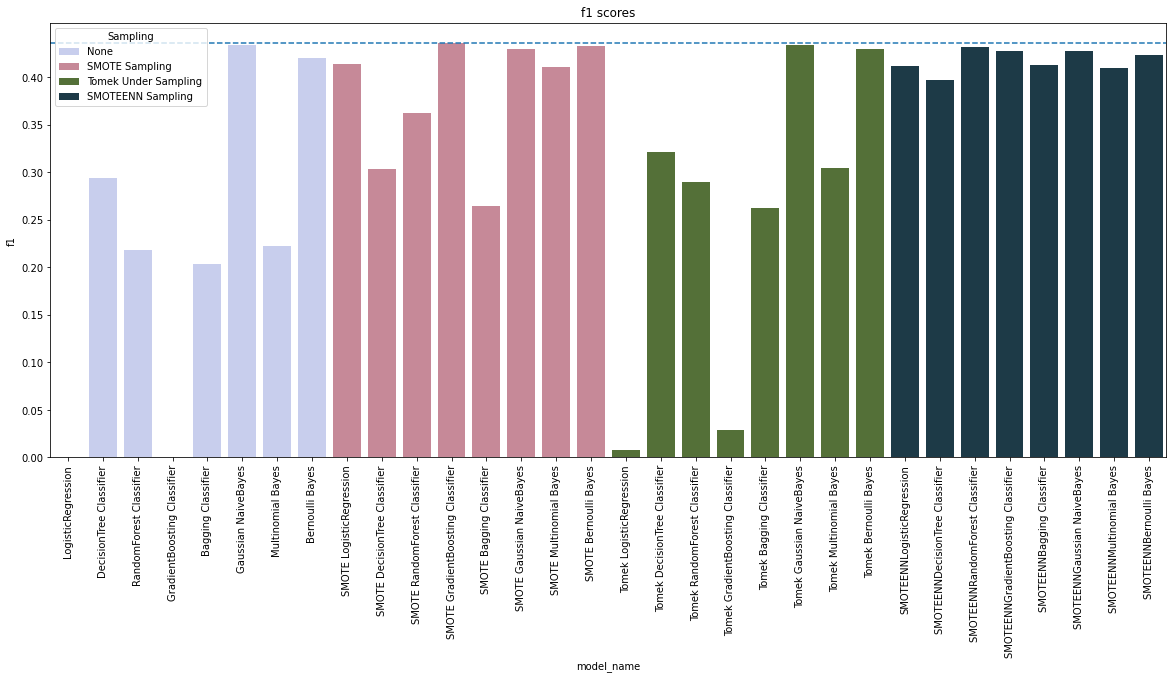

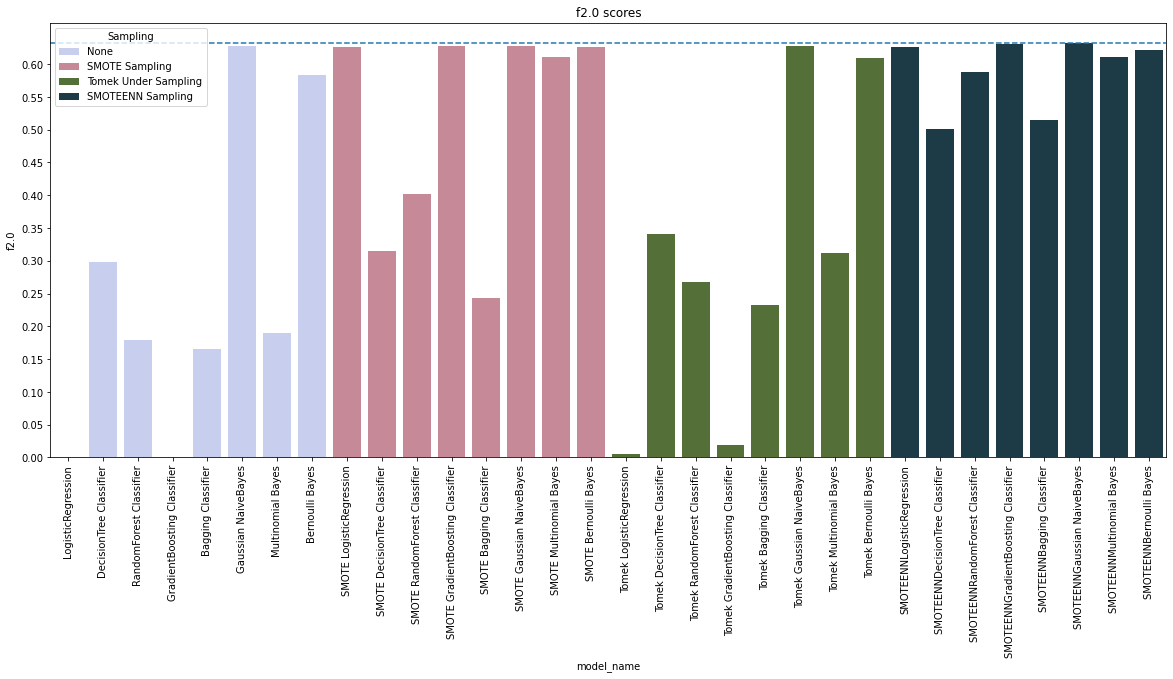

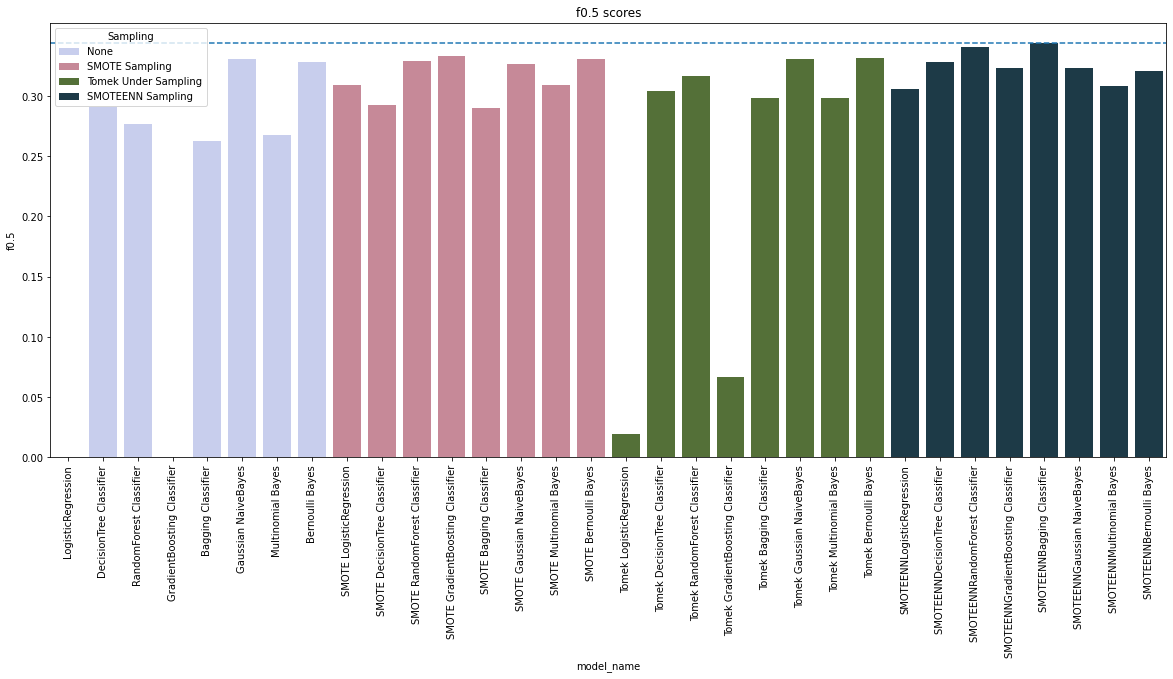

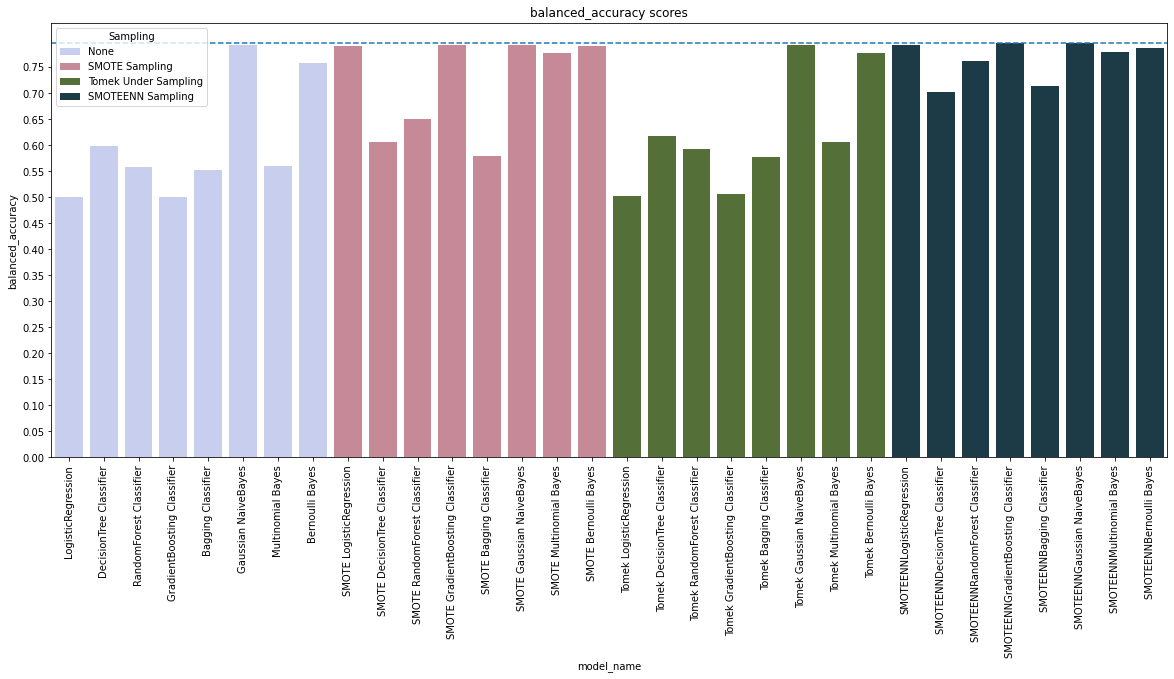

In [138]:
metrics = ['f1', 'f2.0', 'f0.5', 'balanced_accuracy']
for i in metrics:
  print('\n')
  plt.figure(figsize = (20,8))
  sns.barplot( y = i, x = 'model_name',hue = 'Sampling' ,data=final_report, palette = 'cubehelix_r',dodge=False)
  plt.yticks(ticks = np.arange(0,final_report[i].max(), .05 ))
  plt.xticks(rotation =90)
  plt.axhline(y = final_report[i].max(), ls = '--')
  plt.title(f"{i} scores")
  plt.show()
